<a href="https://www.kaggle.com/code/oscarm524/ps-s3-ep3-eda-modeling?scriptVersionId=119055295" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">IBM HR Analytics</h1> 

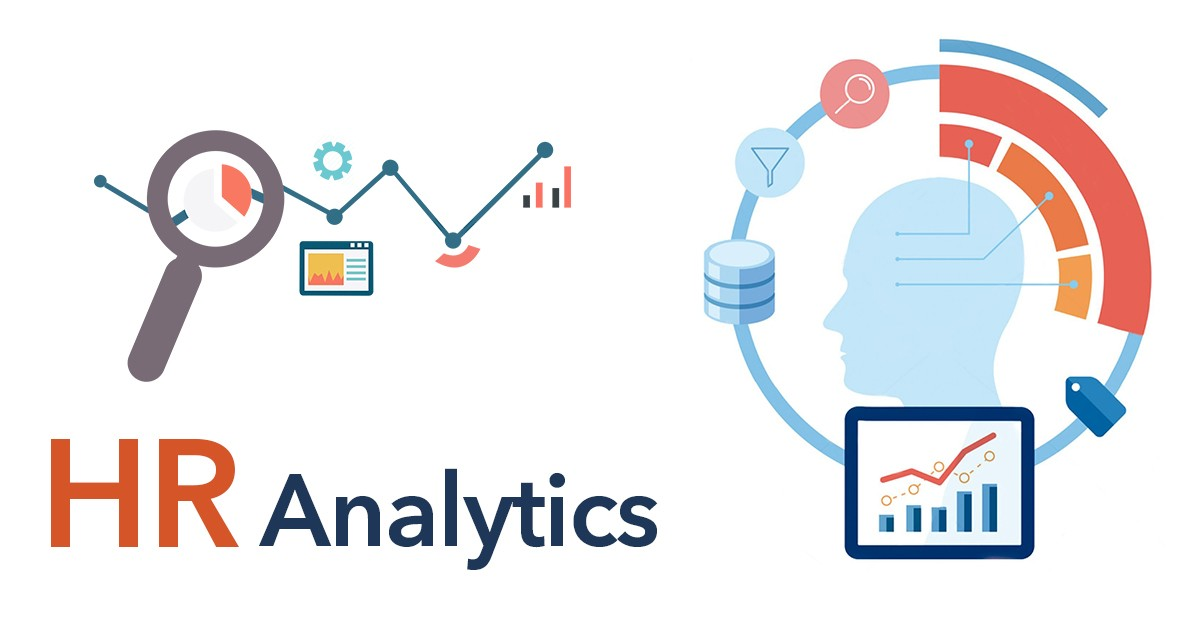

<a id="table"></a>
<h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table of Contents</h1>

[1. Notebook Versions](#Notebook-Versions)

[2. Loading Libraries](#Loading-Libraries)

[3. Reading Data Files](#Reading-Data-Files)

[4. Data Exploration](#Data-Exploration)

[5. Feature Engineering](#Feature-Engineering)

[6. Logistic Modeling](#Logistic-Modeling)

[7. Random Forest Modeling](#Random-Forest-Modeling)

[8. XGBoost Modeling](#XGBoost-Modeling)

[9. LightGBM Modeling](#LightGBM-Modeling)

[10. CatBoost Modeling](#CatBoost-Modeling)

[11. Model Performance Comparisson](#Model-Performance-Comparisson)

[11. Ensemble Learning](#Ensemble-Learning)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Notebook Versions</h1>

1. Version 1 (01/16/2023)
    * EDA 
    * Logistic regression modeling
    * Random forest modeling
    * XGBoost modeling
    
2. Version 2 (01/16/2023)
    * Fixing bugs in submission files
    
3. Version 3 (01/16/2023)
    * Fixing bug in data exploration
    
4. Version 4 (01/17/2023)
    * XGBoost hyper-parameters updated.
    * LightGBM added

5. Version 5 (01/17/2023)
    * CatBoost added
    * Ensemble learning added
    
6. Version 6 (01/17/2023)
    * Feature engineering added
    
7. Version 7 (01/18/2023)
    * Model performance comparisson added
    * Ensemble learning updated
    
8. Version 8 (01/19/2023)    
    * Feature importance added

9. Version 9 (01/20/2023)
    * Fixing bug in prediction (LightGBM and CatBoost had the logistic predictions)
    * Adding engineered features from discussion forum.
    
10. Version 10 (02/13/2023)
    * Linking to GitHub

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Loading Libraries</h1>    

In [1]:
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Reading Data Files</h1> 

In [2]:
train = pd.read_csv('../input/playground-series-s3e3/train.csv')
test = pd.read_csv('../input/playground-series-s3e3/test.csv')
submission = pd.read_csv('../input/playground-series-s3e3/sample_submission.csv')

print('The dimession of the train dataset is:', train.shape)
print('The dimession of the test dataset is:', test.shape)

The dimession of the train dataset is: (1677, 35)
The dimession of the test dataset is: (1119, 34)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [4]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [5]:
train.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,14.903399,3.127609,2.751342,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,3.420801,0.333753,1.077905,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,17.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [6]:
test.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,43,3,1,Laboratory Technician,3,Single,2318,17778,1,Y,No,12,3,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,67,3,2,Sales Executive,1,Divorced,5486,12421,6,Y,Yes,12,3,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,Male,41,3,1,Research Scientist,4,Divorced,2741,23577,4,Y,Yes,13,3,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,Male,89,2,2,Healthcare Representative,3,Single,5228,20364,1,Y,No,13,3,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,Male,79,3,1,Laboratory Technician,4,Single,1223,15178,1,Y,No,14,3,1,80,0,1,5,3,1,0,0,0


In [7]:
test.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.0,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.0,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,2236.000000,36.147453,883.550492,8.667560,2.941912,1.0,2.736372,68.226095,2.741734,1.999106,2.767650,6153.750670,14712.646113,2.544236,14.763181,3.109026,2.722073,80.0,0.758713,10.685433,2.795353,2.759607,7.016979,4.184093,2.076854,4.308311
std,323.171781,8.786102,366.427230,7.772384,1.012986,0.0,1.106668,19.495282,0.652751,1.091109,1.103576,4558.597502,6916.185207,2.460340,3.397653,0.311811,1.058472,0.0,0.826037,7.251628,1.195600,0.656830,5.975403,3.533139,3.278022,3.729282
min,1677.000000,18.000000,6.000000,1.000000,1.000000,1.0,0.000000,30.000000,0.000000,1.000000,1.000000,464.000000,959.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1956.500000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,52.000000,2.000000,1.000000,2.000000,2853.000000,8821.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,2236.000000,35.000000,889.000000,7.000000,3.000000,1.0,3.000000,71.000000,3.000000,2.000000,3.000000,4721.000000,15211.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2515.500000,41.000000,1206.000000,12.000000,4.000000,1.0,4.000000,85.000000,3.000000,2.000000,4.000000,7082.500000,20652.000000,4.000000,17.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,2795.000000,59.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,17.000000,25.000000,4.000000,4.000000,80.0,4.000000,38.000000,6.000000,4.000000,36.000000,17.000000,15.000000,17.000000


> <div class="alert alert-block alert-info">
<b>💡</b> There are no missing values neither in the train nor test datasets. Notice the following: 
    <ul>
    <li> There is one observation with Education = 15 in the train dataset, which is different from the other values. </li>
    <li> There is one observation with StockOptionLevel = 4 in the test dataset, which is different form the other values. </li> 
    </ul>
    </div>

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data Exploration</h1> 

In [8]:
round(100*train['Attrition'].value_counts() / train.shape[0], 2) 

0    88.07
1    11.93
Name: Attrition, dtype: float64

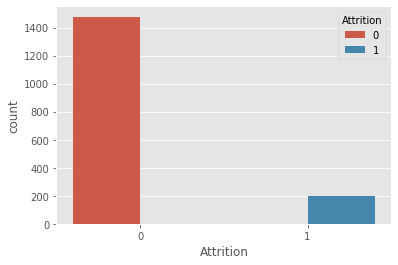

In [9]:
sns.countplot(x = 'Attrition', hue = 'Attrition', data = train);

> <div class="alert alert-block alert-info">
<b>💡</b> From the above chart, we see that the data is imbalanced (~88% are 0s and ~12% are 1s).</div>

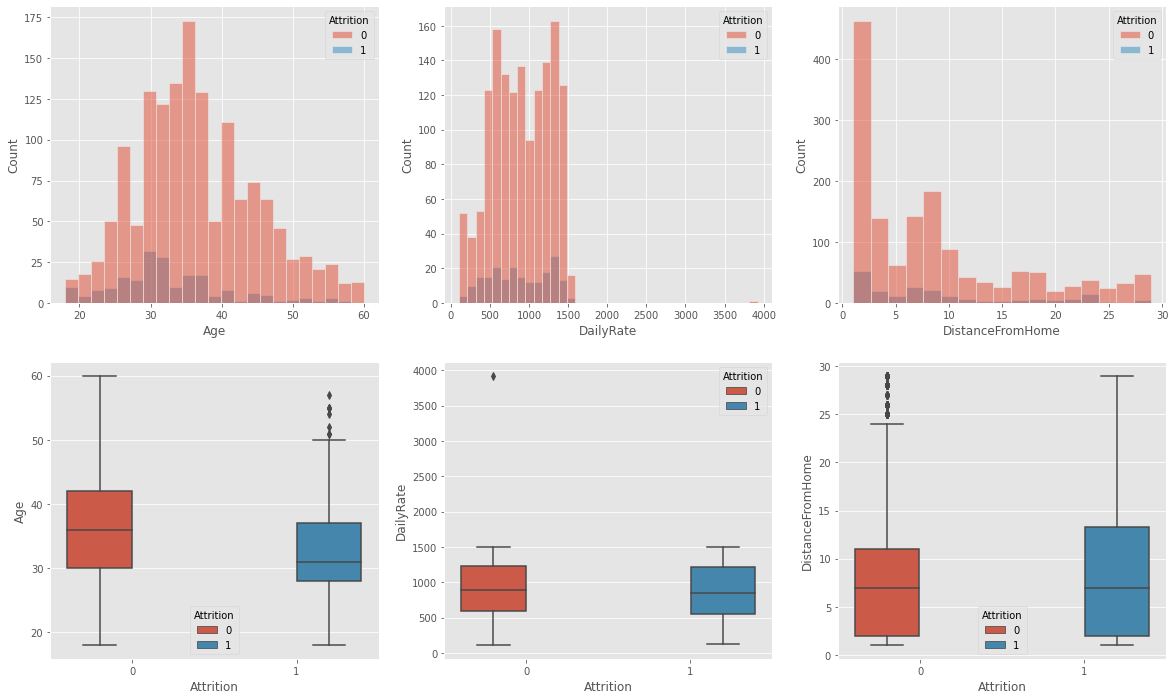

In [10]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))

sns.histplot(ax = axes[0, 0], x = 'Age', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 1], x = 'DailyRate', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 2], x = 'DistanceFromHome', hue = 'Attrition', fill = True, data = train)
sns.boxplot(ax = axes[1, 0], x = 'Attrition', y = 'Age', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 1], x = 'Attrition', y = 'DailyRate', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 2], x = 'Attrition', y = 'DistanceFromHome', hue = 'Attrition', data = train);

> <div class="alert alert-block alert-info">
<b>💡</b> From the left panels (top and bottom), we can see there is slightly difference when compared the median age value of employees who left and the one who stayed. From the center and right panels (top and bottom), we see that there is a lot of overlapping in the DailyRate and the DistanceFromHome distributions of employees who left and stayed, respectively.  </div>

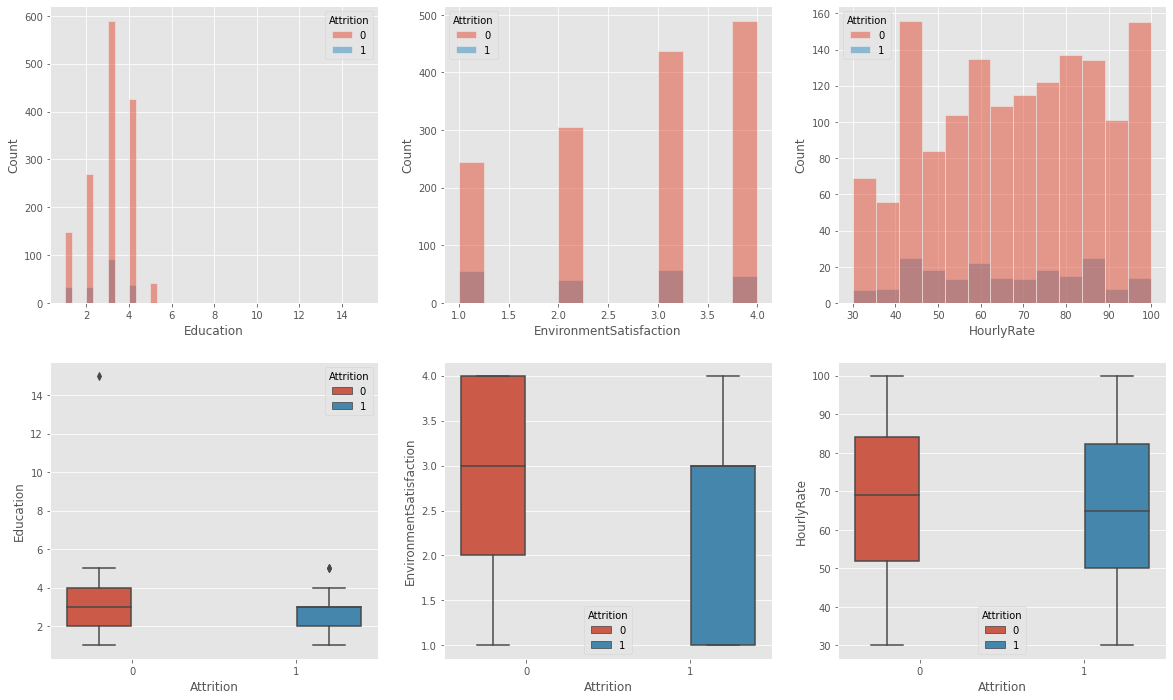

In [11]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))

sns.histplot(ax = axes[0, 0], x = 'Education', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 1], x = 'EnvironmentSatisfaction', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 2], x = 'HourlyRate', hue = 'Attrition', fill = True, data = train)
sns.boxplot(ax = axes[1, 0], x = 'Attrition', y = 'Education', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 1], x = 'Attrition', y = 'EnvironmentSatisfaction', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 2], x = 'Attrition', y = 'HourlyRate', hue = 'Attrition', data = train);

> <div class="alert alert-block alert-info">
> <b>💡</b> From the above charts, there is no much to learn due to similarity in the distribution of the two groups. In the bottom left panel, we can see an observation with Education equal to 15, which very different from the others. In the bottom right panel, we can see there is slightly difference when compared the median HourlyRate value of employees who left and the one who stayed. </div>

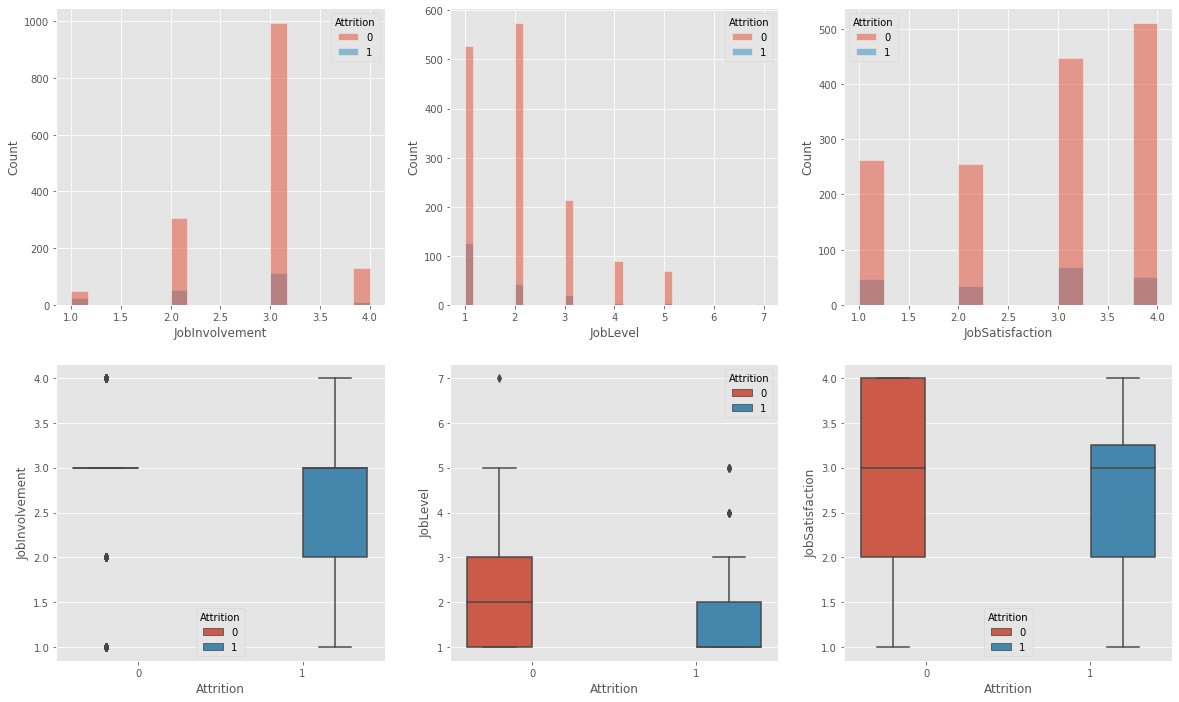

In [12]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))

sns.histplot(ax = axes[0, 0], x = 'JobInvolvement', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 1], x = 'JobLevel', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 2], x = 'JobSatisfaction', hue = 'Attrition', fill = True, data = train)
sns.boxplot(ax = axes[1, 0], x = 'Attrition', y = 'JobInvolvement', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 1], x = 'Attrition', y = 'JobLevel', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 2], x = 'Attrition', y = 'JobSatisfaction', hue = 'Attrition', data = train);

> <div class="alert alert-block alert-info">
<b>💡</b> From the above charts, there is no much to learn due to similarity in the distributions of the two groups.</div>

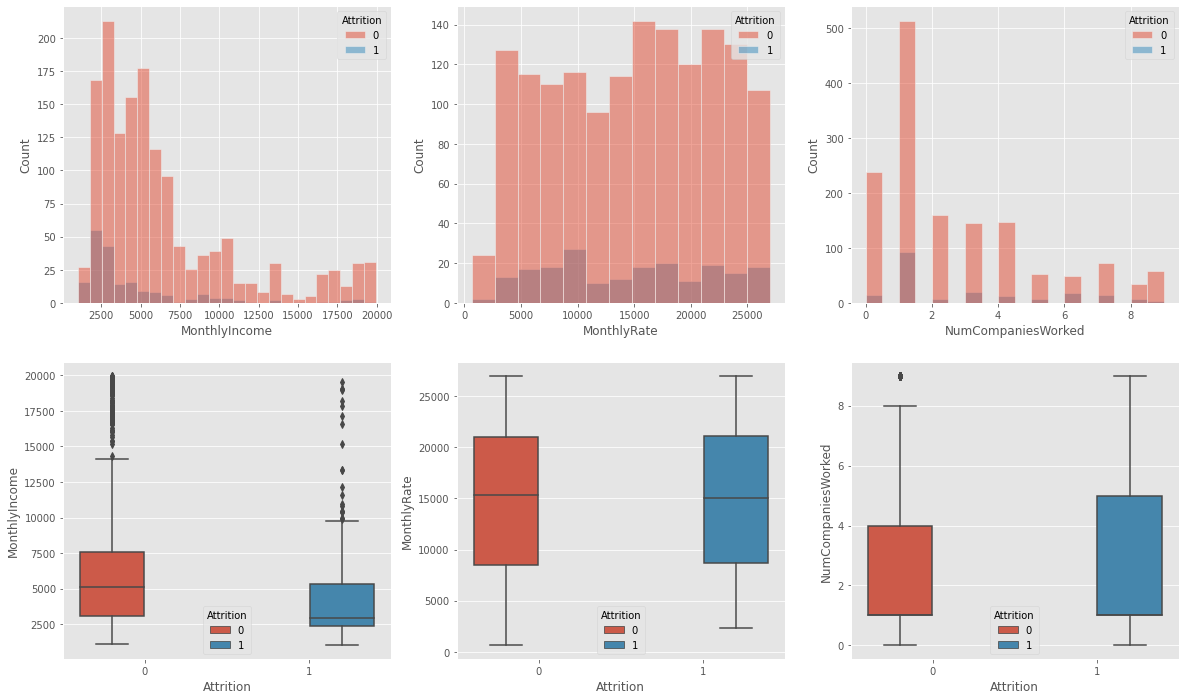

In [13]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))

sns.histplot(ax = axes[0, 0], x = 'MonthlyIncome', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 1], x = 'MonthlyRate', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 2], x = 'NumCompaniesWorked', hue = 'Attrition', fill = True, data = train)
sns.boxplot(ax = axes[1, 0], x = 'Attrition', y = 'MonthlyIncome', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 1], x = 'Attrition', y = 'MonthlyRate', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 2], x = 'Attrition', y = 'NumCompaniesWorked', hue = 'Attrition', data = train);

> <div class="alert alert-block alert-info">
<b>💡</b> From the center and right panels, there is no much to learn due to similarity in the distributions of the two groups. From the left panels, we can see there is slightly difference when compared the median MonthlyIncome value of employees who left and the one who stayed.</div>

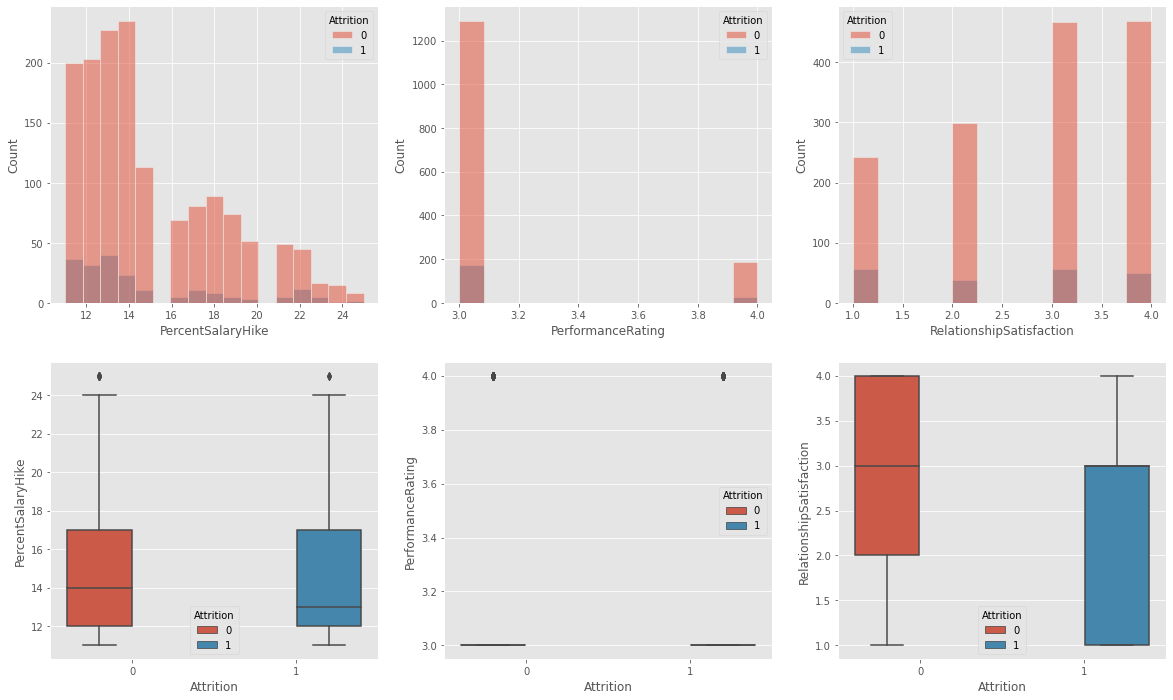

In [14]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))

sns.histplot(ax = axes[0, 0], x = 'PercentSalaryHike', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 1], x = 'PerformanceRating', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 2], x = 'RelationshipSatisfaction', hue = 'Attrition', fill = True, data = train)
sns.boxplot(ax = axes[1, 0], x = 'Attrition', y = 'PercentSalaryHike', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 1], x = 'Attrition', y = 'PerformanceRating', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 2], x = 'Attrition', y = 'RelationshipSatisfaction', hue = 'Attrition', data = train);

> <div class="alert alert-block alert-info">
<b>💡</b> From the center and left panels, there is no much to learn due to similarity in the distributions of the two groups. From the right panels, we can see there is slightly difference when compared the median RelationshipSatisfaction values of employees who left and the one who stayed.</div>

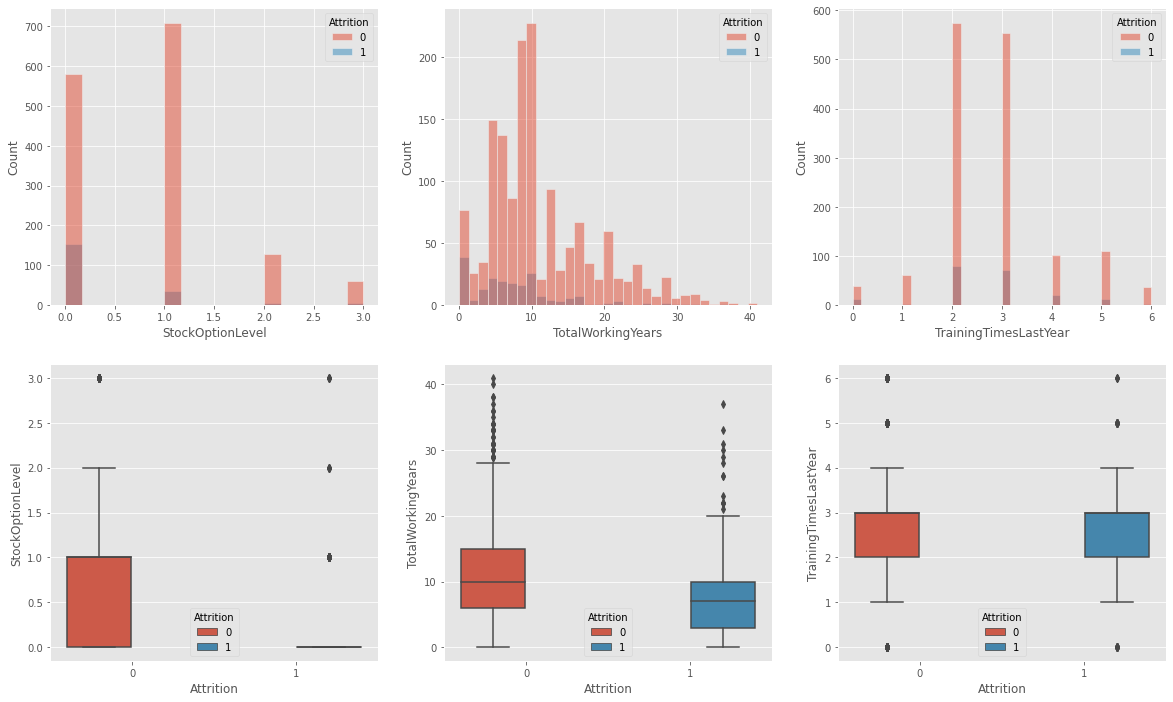

In [15]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))

sns.histplot(ax = axes[0, 0], x = 'StockOptionLevel', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 1], x = 'TotalWorkingYears', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 2], x = 'TrainingTimesLastYear', hue = 'Attrition', fill = True, data = train)
sns.boxplot(ax = axes[1, 0], x = 'Attrition', y = 'StockOptionLevel', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 1], x = 'Attrition', y = 'TotalWorkingYears', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 2], x = 'Attrition', y = 'TrainingTimesLastYear', hue = 'Attrition', data = train);

> <div class="alert alert-block alert-info">
<b>💡</b> From the right and left panels, there is no much to learn due to similarity in the distributions of the two groups. From the center panels, we can see there is slightly difference when compared the median TotalWorkingYears values of employees who left and the one who stayed.</div>

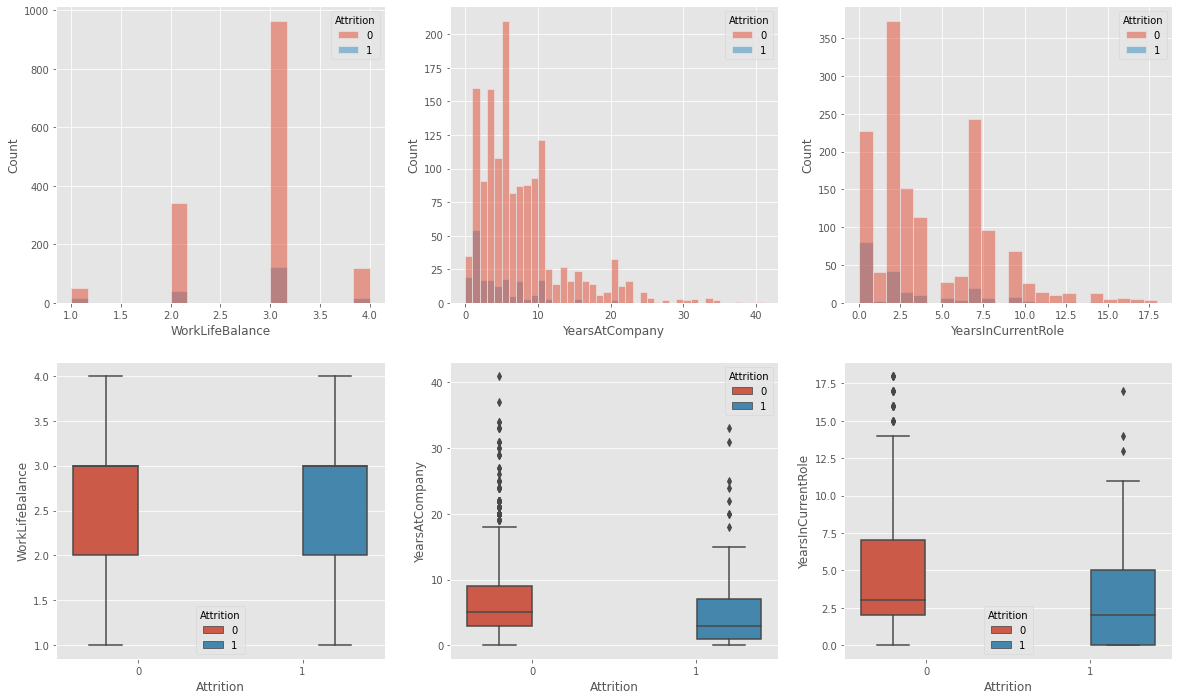

In [16]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))

sns.histplot(ax = axes[0, 0], x = 'WorkLifeBalance', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 1], x = 'YearsAtCompany', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 2], x = 'YearsInCurrentRole', hue = 'Attrition', fill = True, data = train)
sns.boxplot(ax = axes[1, 0], x = 'Attrition', y = 'WorkLifeBalance', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 1], x = 'Attrition', y = 'YearsAtCompany', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 2], x = 'Attrition', y = 'YearsInCurrentRole', hue = 'Attrition', data = train);

> <div class="alert alert-block alert-info">
<b>💡</b> From the left panels, there is no much to learn due to similarity in the distributions of the two groups. From the center and right panels, we can see there is slightly difference when compared the median YearsAtCompany and YearsInCurrentRole values of employees who left and the one who stayed, respectively.</div>

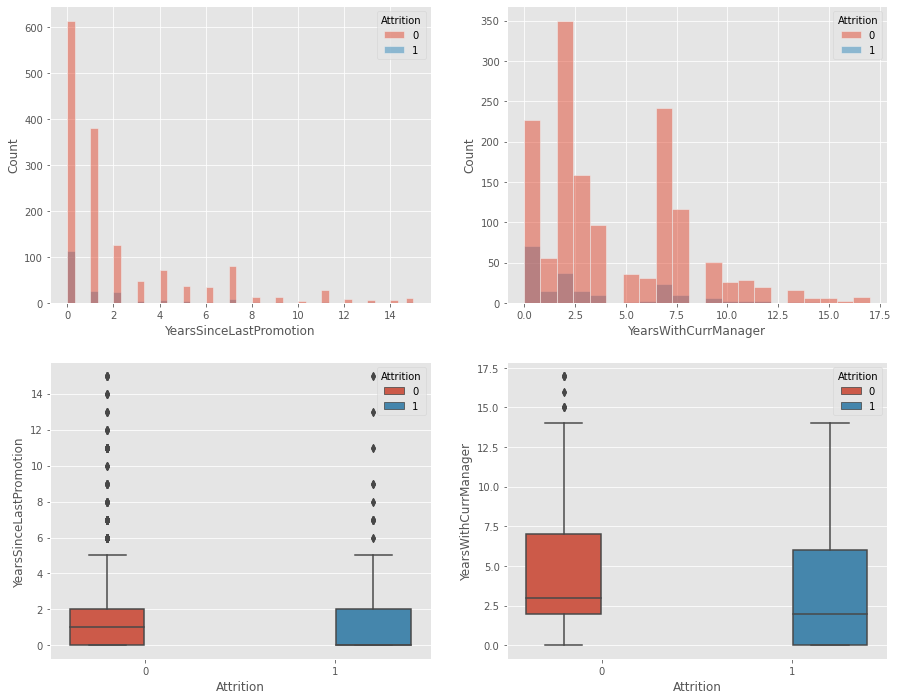

In [17]:
fig, axes = plt.subplots(2, 2, figsize = (15, 12))

sns.histplot(ax = axes[0, 0], x = 'YearsSinceLastPromotion', hue = 'Attrition', fill = True, data = train)
sns.histplot(ax = axes[0, 1], x = 'YearsWithCurrManager', hue = 'Attrition', fill = True, data = train)
sns.boxplot(ax = axes[1, 0], x = 'Attrition', y = 'YearsSinceLastPromotion', hue = 'Attrition', data = train)
sns.boxplot(ax = axes[1, 1], x = 'Attrition', y = 'YearsWithCurrManager', hue = 'Attrition', data = train);

> <div class="alert alert-block alert-info">
<b>💡</b> From the left panels, there is no much to learn due to similarity in the distributions of the two groups. From the right panels, we can see there is slightly difference when compared the median YearsWithCurrManager values of employees who left and the one who stayed, respectively.</div>

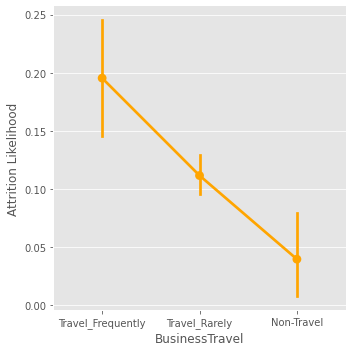

In [18]:
plot1 = sns.catplot(data = train, x = 'BusinessTravel', y = 'Attrition', kind = 'point', color = 'orange')
plot1.set_xlabels('BusinessTravel', fontsize = 12) 
plot1.set_ylabels('Attrition Likelihood', fontsize = 12);

> <div class="alert alert-block alert-info">
<b>💡</b> From the above chart, we see that employees who travel frequently have a much higher likelihood of attrition when compared to other two groups.</div>

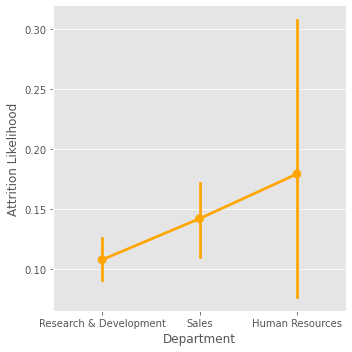

In [19]:
plot1 = sns.catplot(data = train, x = 'Department', y = 'Attrition', kind = 'point', color = 'orange')
plot1.set_xlabels('Department', fontsize = 12) 
plot1.set_ylabels('Attrition Likelihood', fontsize = 12);

> <div class="alert alert-block alert-info">
<b>💡</b> From the above chart, we see that employees from the HR department have a higher likelihood of attrition when compare to other two departments.</div>

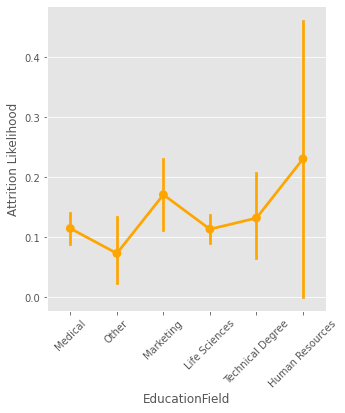

In [20]:
plot1 = sns.catplot(data = train, x = 'EducationField', y = 'Attrition', kind = 'point', color = 'orange')
plot1.set_xlabels('EducationField', fontsize = 12)
plt.xticks(rotation = 45)
plot1.set_ylabels('Attrition Likelihood', fontsize = 12);

> <div class="alert alert-block alert-info">
<b>💡</b> From the above chart, we see that employees from the HR field have a higher likelihood of attrition when compare to other fields.</div>

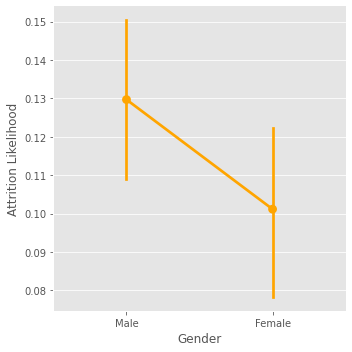

In [21]:
plot1 = sns.catplot(data = train, x = 'Gender', y = 'Attrition', kind = 'point', color = 'orange')
plot1.set_xlabels('Gender', fontsize = 12)
plot1.set_ylabels('Attrition Likelihood', fontsize = 12);

> <div class="alert alert-block alert-info">
<b>💡</b> From the above chart, we see that male employees have a higher likelihood of attrition when compare to female employees.</div>

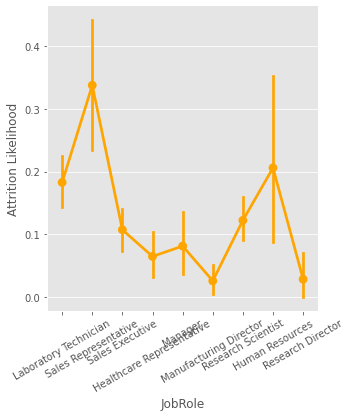

In [22]:
plot1 = sns.catplot(data = train, x = 'JobRole', y = 'Attrition', kind = 'point', color = 'orange')
plot1.set_xlabels('JobRole', fontsize = 12)
plt.xticks(rotation = 30)
plot1.set_ylabels('Attrition Likelihood', fontsize = 12);

> <div class="alert alert-block alert-info">
<b>💡</b> From the above chart, we see that Sales Representative employees have the higher attrition likelihood. Human resources employess have the second highest attribution likelihood.</div>

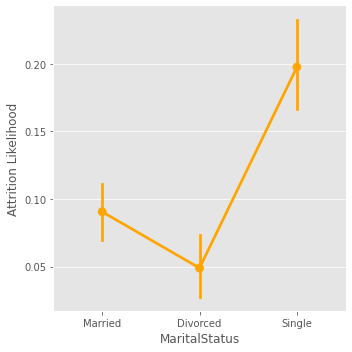

In [23]:
plot1 = sns.catplot(data = train, x = 'MaritalStatus', y = 'Attrition', kind = 'point', color = 'orange')
plot1.set_xlabels('MaritalStatus', fontsize = 12)
plot1.set_ylabels('Attrition Likelihood', fontsize = 12);

> <div class="alert alert-block alert-info">
<b>💡</b> From the above chart, we see that single employees have the higher attrition likilehood.</div>

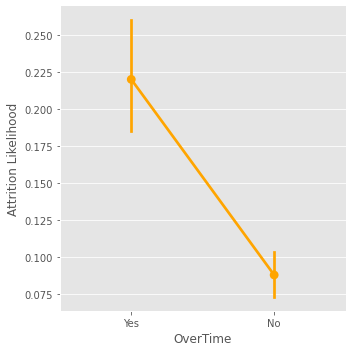

In [24]:
plot1 = sns.catplot(data = train, x = 'OverTime', y = 'Attrition', kind = 'point', color = 'orange')
plot1.set_xlabels('OverTime', fontsize = 12)
plot1.set_ylabels('Attrition Likelihood', fontsize = 12);

> <div class="alert alert-block alert-info">
<b>💡</b> From the above chart, we see that employees who worked overtime have the higher attrition likilehood.</div>

<div class="alert alert-block alert-info">
<b>💡 Insights from EDA:</b><br> 
<ul>
    <li> There is a slighlty relationship between age and attrition. Older employees are more likely to stay. </li>
    <li> There is an employee with Education level equal to 15 (maybe this value can be replace by a reasonable value). </li>
    <li> There is slightly difference when compared the median HourlyRate value of employees who left and the one who stayed. </li>
    <li> There is slightly difference when compared the median MonthlyIncome value of employees who left and the one who stayed. </li>
    <li> There is slightly difference when compared the median TotalWorkingYears values of employees who left and the one who stayed. </li>
    <li> There is slightly difference when compared the median YearsAtCompany and YearsInCurrentRole values of employees who left and the one who stayed, respectively. </li>
    <li> There is slightly difference when compared the median YearsWithCurrManager values of employees who left and the one who stayed, respectively. </li>
    <li> Employees who travel frequently have a much higher likelihood of attrition. </li>
    <li> Employees from the HR department have a higher likelihood of attrition when compare to other two departments. </li>
    <li> Male employees have a higher likelihood of attrition when compare to female employees. </li>
    <li> Sales Representative employees have the higher attrition likelihood. </li>
    <li> Single employees have the higher attrition likilehood. </li>
    <li> Employees who worked overtime have the higher attrition likilehood. </li>
    <li> Over18, StandardHours, and EmployeeCount can be dropped. They have the same values for all the observations.
</ul>
</div>

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Feature Engineering</h1> 

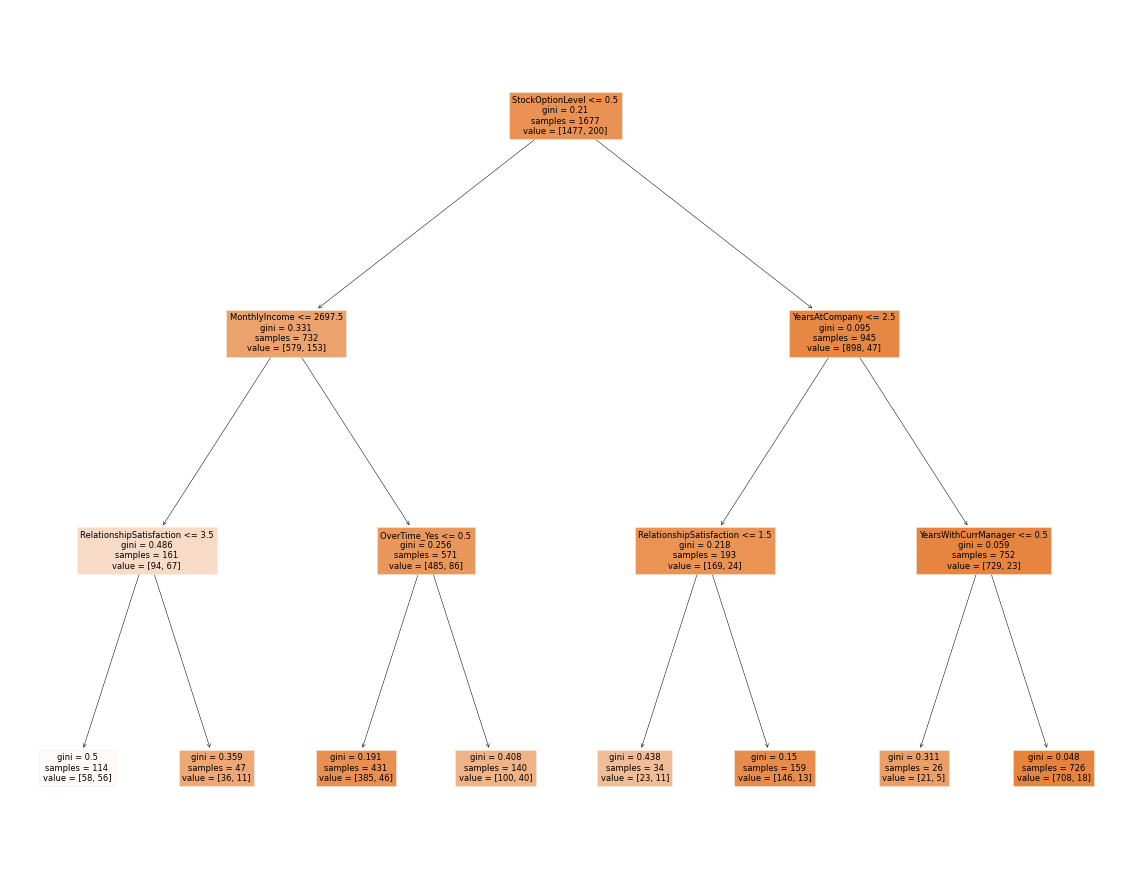

In [25]:
## Replacing weird Education value
train.loc[train['Education'] == 15, 'Education'] = 5

## Replacing weird StockOptionLevel value
test.loc[test['StockOptionLevel'] == 4, 'StockOptionLevel'] = 3

train_FE = train.copy()

## Defining inputs and target
train_dummies = pd.get_dummies(train_FE[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']])
train_dummies = train_dummies.drop(columns = ['BusinessTravel_Non-Travel', 'Department_Research & Development', 'EducationField_Other', 'Gender_Female', 'JobRole_Manufacturing Director', 'MaritalStatus_Divorced', 'OverTime_No'])

X = train_FE.drop(columns = ['id', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Over18', 'StandardHours', 'EmployeeCount', 'Attrition'], axis = 1)
X = pd.concat([X, train_dummies], axis = 1)
Y = train_FE['Attrition']

## Building a decision tree model with max depth = 3 on the train data-frame
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X, Y)

## Visualizing the decision tree model and identify any interesting interactions/features
fig = plt.figure(figsize = (20, 16))
plot_tree(tree_md, feature_names = X.columns, filled = True);

In [26]:
## Decision tree features
train['feature_1'] = np.where(((train['StockOptionLevel'] >= 1) & (train['YearsAtCompany'] >= 3) & (train['YearsWithCurrManager'] >= 1)), 1, 0)
train['feature_2'] = np.where(((train['StockOptionLevel'] < 1) & (train['MonthlyIncome'] > 2700) & (train['OverTime'] == 'Yes')), 1, 0) 

# https://www.kaggle.com/competitions/playground-series-s3e3/discussion/379117
train['Rate'] = train['DailyRate'] * 20 + train['HourlyRate'] * 8 * 20 + train['MonthlyRate']
train['RateExtended'] = train['Rate'] * (8 - train['JobSatisfaction'] - train['EnvironmentSatisfaction'])
train['TotalJobSatisfaction'] = train['EnvironmentSatisfaction'] + train['JobSatisfaction'] + train['RelationshipSatisfaction']
train['DistanceFromHome_rootedTo_JobSatisfaction'] = train['DistanceFromHome']**(1/train['JobSatisfaction'])

# https://www.kaggle.com/competitions/playground-series-s3e3/discussion/378994
train["Age_risk"] = (train["Age"] < 34).astype(int)
train["HourlyRate_risk"] = (train["HourlyRate"] < 60).astype(int)
train["Distance_risk"] = (train["DistanceFromHome"] >= 20).astype(int)
train["YearsAtCo_risk"] = (train["YearsAtCompany"] < 4).astype(int)
train["AttritionRisk"] = train["Age_risk"] + train["HourlyRate_risk"] + train["Distance_risk"] + train["YearsAtCo_risk"]

## Decision tree features
test['feature_1'] = np.where(((test['StockOptionLevel'] >= 1) & (test['YearsAtCompany'] >= 3) & (test['YearsWithCurrManager'] >= 1)), 1, 0)
test['feature_2'] = np.where(((test['StockOptionLevel'] < 1) & (test['MonthlyIncome'] > 2700) & (test['OverTime'] == 'Yes')), 1, 0) 

# https://www.kaggle.com/competitions/playground-series-s3e3/discussion/379117
test['Rate'] = test['DailyRate'] * 20 + test['HourlyRate'] * 8 * 20 + test['MonthlyRate']
test['RateExtended'] = test['Rate'] * (8 - test['JobSatisfaction'] - test['EnvironmentSatisfaction'])
test['TotalJobSatisfaction'] = test['EnvironmentSatisfaction'] + test['JobSatisfaction'] + test['RelationshipSatisfaction']
test['DistanceFromHome_rootedTo_JobSatisfaction'] = test['DistanceFromHome']**(1/test['JobSatisfaction'])

# https://www.kaggle.com/competitions/playground-series-s3e3/discussion/378994
test["Age_risk"] = (test["Age"] < 34).astype(int)
test["HourlyRate_risk"] = (test["HourlyRate"] < 60).astype(int)
test["Distance_risk"] = (test["DistanceFromHome"] >= 20).astype(int)
test["YearsAtCo_risk"] = (test["YearsAtCompany"] < 4).astype(int)
test["AttritionRisk"] = test["Age_risk"] + test["HourlyRate_risk"] + test["Distance_risk"] + test["YearsAtCo_risk"]

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Logistic Modeling</h1> 

In [27]:
train_logit = train.copy()
test_logit = test.copy()

## Defining scaler
scaler = MinMaxScaler()

## Defining inputs and target
train_dummies = pd.get_dummies(train_logit[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']])
train_dummies = train_dummies.drop(columns = ['BusinessTravel_Non-Travel', 'Department_Research & Development', 'EducationField_Other', 'Gender_Female', 'JobRole_Manufacturing Director', 'MaritalStatus_Divorced', 'OverTime_No'])

X = train_logit.drop(columns = ['id', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Over18', 'StandardHours', 'EmployeeCount', 'Attrition'], axis = 1)
X = pd.concat([X, train_dummies], axis = 1)
Y = train_logit['Attrition']

test_dummies = pd.get_dummies(test_logit[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']])
test_dummies = test_dummies.drop(columns = ['BusinessTravel_Non-Travel', 'Department_Research & Development', 'EducationField_Other', 'Gender_Female', 'JobRole_Manufacturing Director', 'MaritalStatus_Divorced', 'OverTime_No'])

test_logit = test_logit.drop(columns = ['id', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Over18', 'StandardHours', 'EmployeeCount'], axis = 1)
test_logit = pd.concat([test_logit, test_dummies], axis = 1)
test_logit = pd.DataFrame(scaler.fit_transform(test_logit), columns = test_logit.columns)

logit_cv_scores, logit_params = list(), list()
preds = list()

## Running 5 times CV
for i in range(5):
    
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        ## Scaling the data
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
        X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)
        
        ## Building logistic model
        logit_md = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear', max_iter = 1000).fit(X_train, Y_train)
        logit_params.append(logit_md.coef_)
    
        ## Predicting on X_test and test
        logit_pred_1 = logit_md.predict_proba(X_test)[:, 1]
        logit_pred_2 = logit_md.predict_proba(test_logit)[:, 1]
        
        ## Computing roc-auc score
        logit_cv_scores.append(roc_auc_score(Y_test, logit_pred_1))
        preds.append(logit_pred_2)
        
logit_cv_score = np.mean(logit_cv_scores)
print('The average oof roc-auc score over 5-folds (run 5 times) is:', logit_cv_score)

The average oof roc-auc score over 5-folds (run 5 times) is: 0.8301701442968391


We next proceed to visualize the importance of the features under the logistic regression model. Notice that the absolute value of each feature coefficient is proportional to its importance.

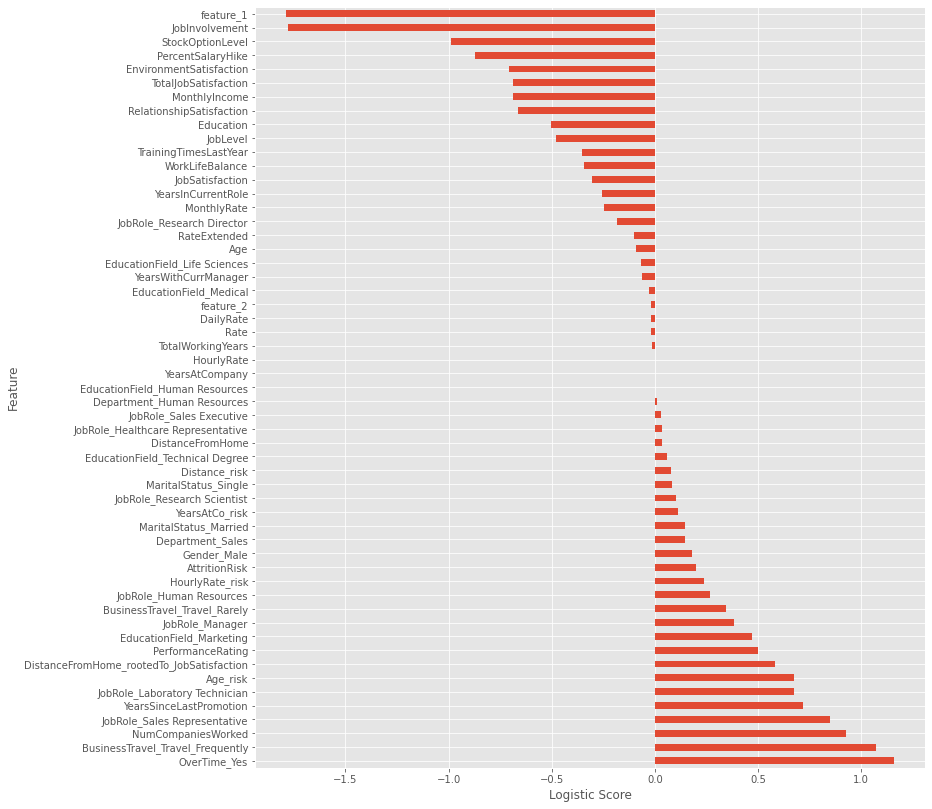

In [28]:
plt.figure(figsize = (12, 14))
pd.DataFrame(np.concatenate(logit_params), columns = X.columns).apply(np.mean, axis = 0).sort_values(ascending = False).plot(kind = 'barh');
plt.xlabel('Logistic Score')
plt.ylabel('Feature')
plt.show();

In [29]:
## Building model in the entire train dataset
logit_md = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear', max_iter = 10000).fit(X, Y)

train_preds = pd.DataFrame({'Attrition': Y, 'Attrition_pred': logit_md.predict_proba(X)[:, 1]})
train_preds.head()

,Attrition,Attrition_pred
0,0,0.168049
1,0,0.028594
2,0,0.005572
3,0,0.076875
4,1,0.084129


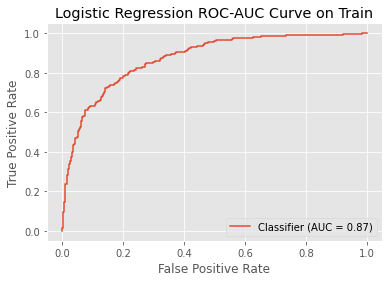

In [30]:
RocCurveDisplay.from_predictions(train_preds['Attrition'], train_preds['Attrition_pred'])
plt.title('Logistic Regression ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

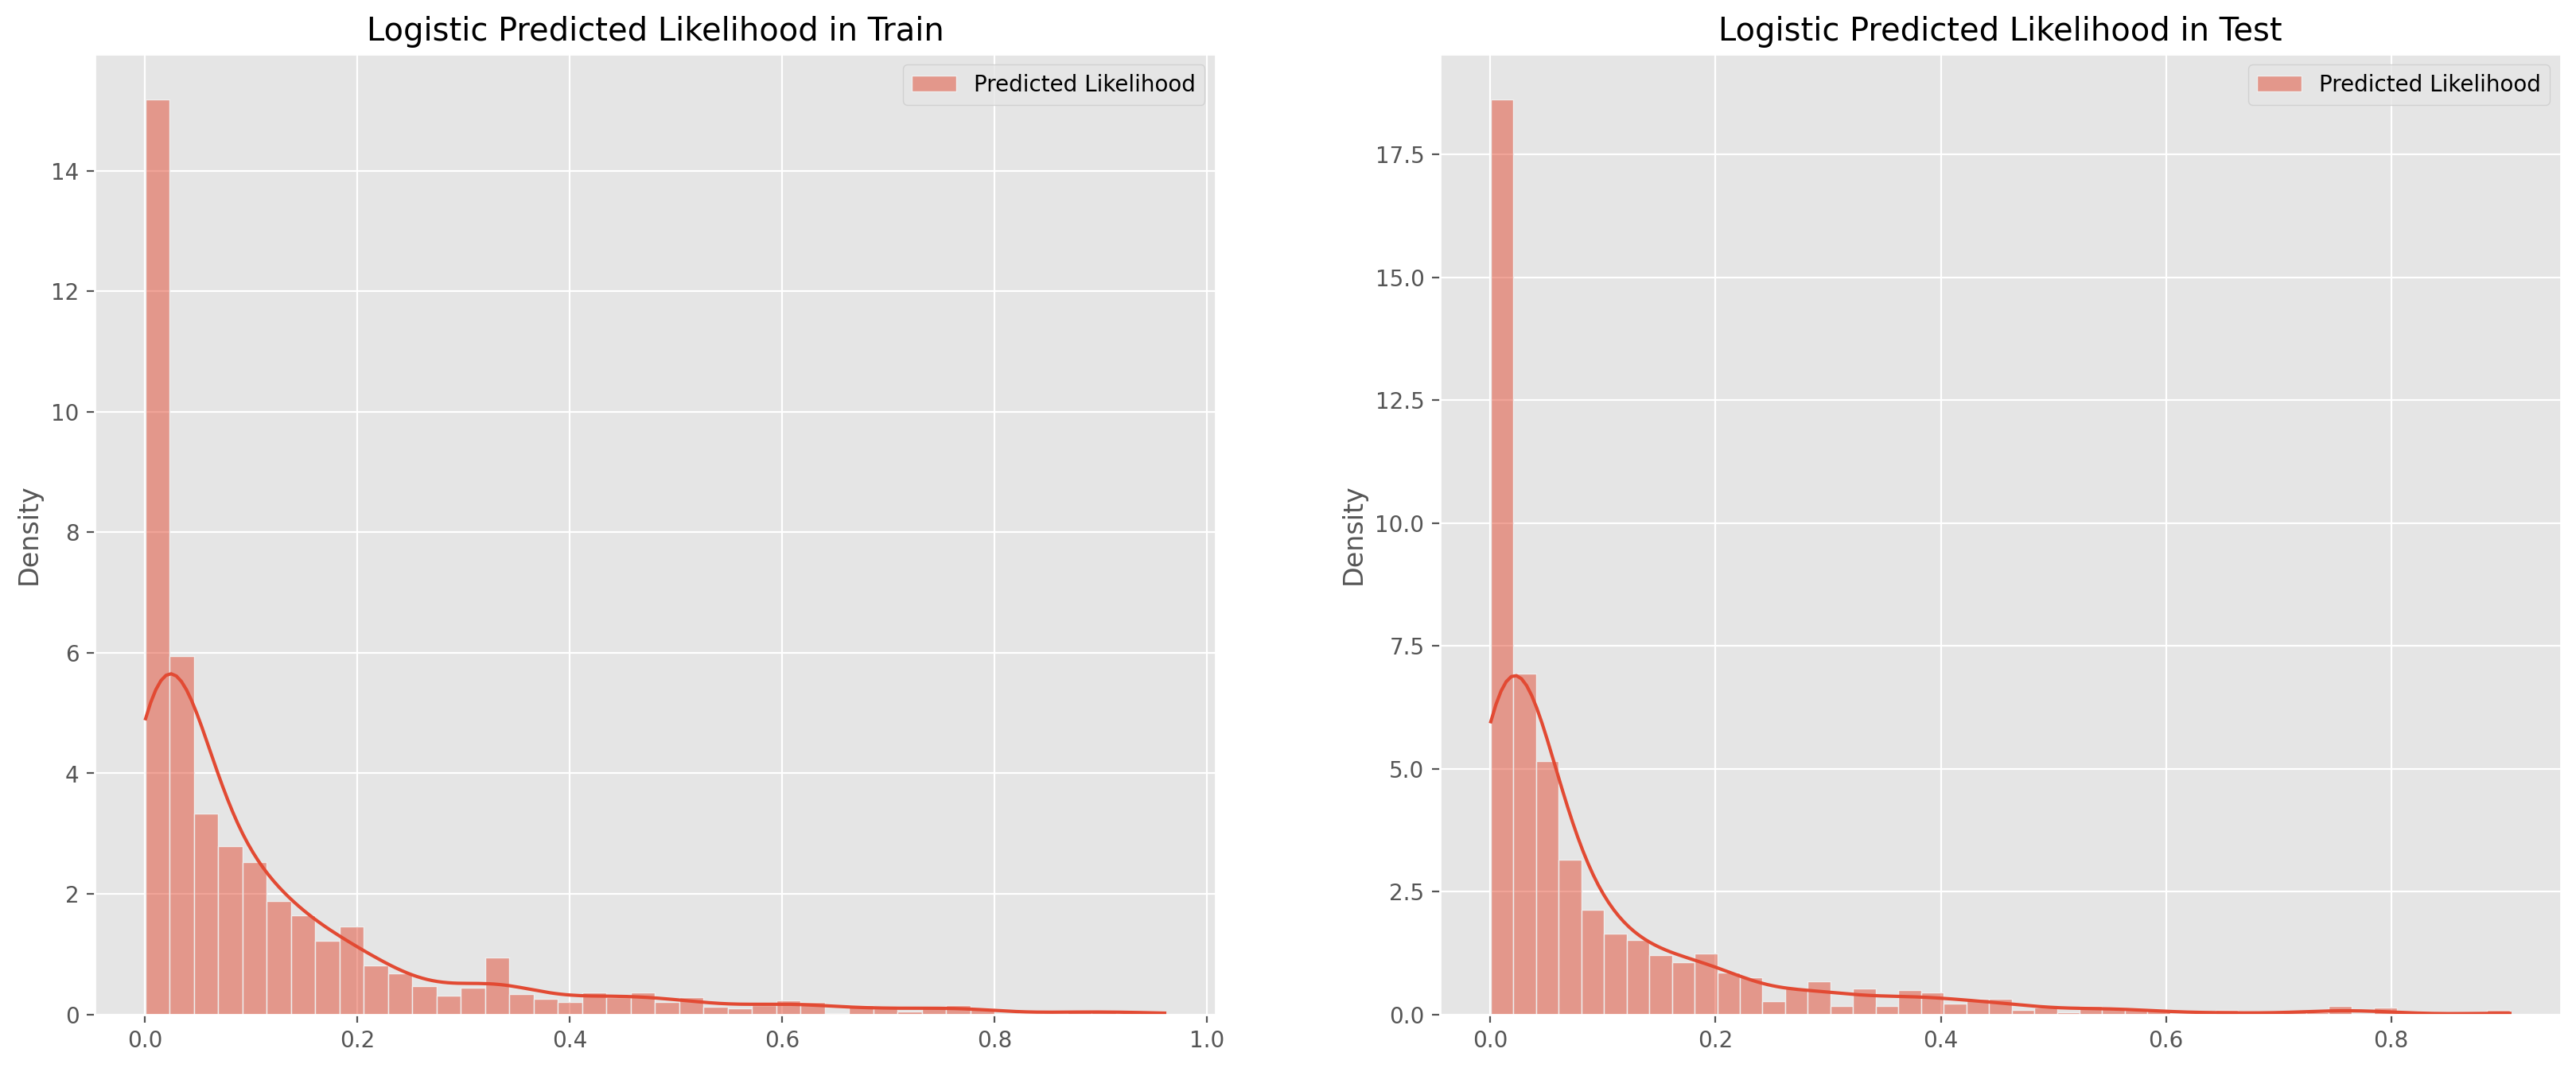

In [31]:
logit_preds_train = train_preds['Attrition_pred']
logit_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

data1 = pd.DataFrame({'Predicted Likelihood': logit_preds_train})
data2 = pd.DataFrame({'Predicted Likelihood': logit_preds_test})

fig, axes = plt.subplots(1, 2, figsize = (20, 8), dpi = 200)
sns.histplot(data = data1, kde = True, stat = 'density', ax = axes[0]).set(title = 'Logistic Predicted Likelihood in Train')
sns.histplot(data = data2, kde = True, stat = 'density', ax = axes[1]).set(title = 'Logistic Predicted Likelihood in Test')
plt.show();

In [32]:
submission['Attrition'] = logit_preds_test
submission.to_csv('logistic_submission.csv', index = False)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Random Forest Modeling</h1> 

In [33]:
RF_cv_scores, RF_imp = list(), list()
preds = list()

## Running 5 times CV
for i in range(5):
    
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        ## Scaling the data
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
        X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)
    
        ## Building RF model
        RF_md = RandomForestClassifier(max_depth = 7, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 500).fit(X_train, Y_train)
        RF_imp.append(RF_md.feature_importances_)
        
        ## Predicting on X_test and test
        RF_pred_1 = RF_md.predict_proba(X_test)[:, 1]
        RF_pred_2 = RF_md.predict_proba(test_logit)[:, 1]
        
        ## Computing roc-auc score
        RF_cv_scores.append(roc_auc_score(Y_test, RF_pred_1))
        preds.append(RF_pred_2)

RF_cv_score = np.mean(RF_cv_scores)    
print('The average oof roc-auc score over 5-folds (run 5 times) is:', RF_cv_score)

The average oof roc-auc score over 5-folds (run 5 times) is: 0.8291786646816307


We next proceed to visualize the importance of the features under the random forest model. 

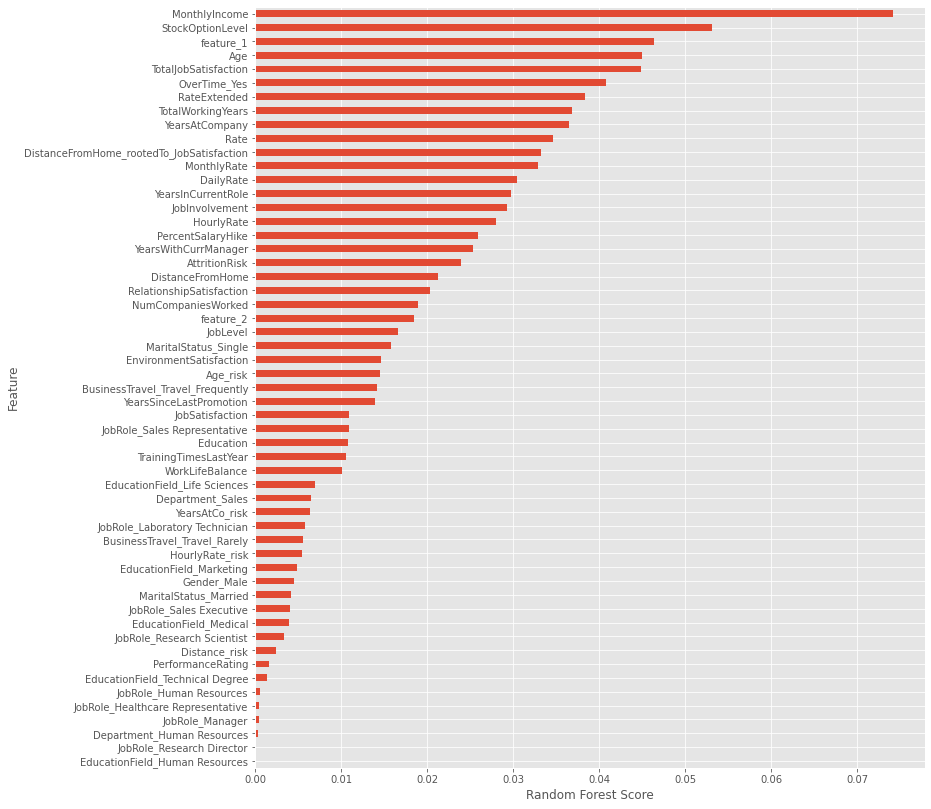

In [34]:
plt.figure(figsize = (12, 14))
pd.DataFrame(RF_imp, columns = X.columns).apply(np.mean, axis = 0).sort_values().plot(kind = 'barh');
plt.xlabel('Random Forest Score')
plt.ylabel('Feature')
plt.show();

In [35]:
## Building model in the entire train dataset
RF_md = RandomForestClassifier(max_depth = 7, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 500).fit(X, Y)

train_preds = pd.DataFrame({'Attrition': Y, 'Attrition_pred': RF_md.predict_proba(X)[:, 1]})
train_preds.head()

,Attrition,Attrition_pred
0,0,0.104509
1,0,0.074173
2,0,0.036928
3,0,0.103668
4,1,0.328054


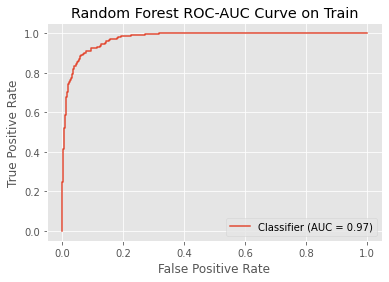

In [36]:
RocCurveDisplay.from_predictions(train_preds['Attrition'], train_preds['Attrition_pred'])
plt.title('Random Forest ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

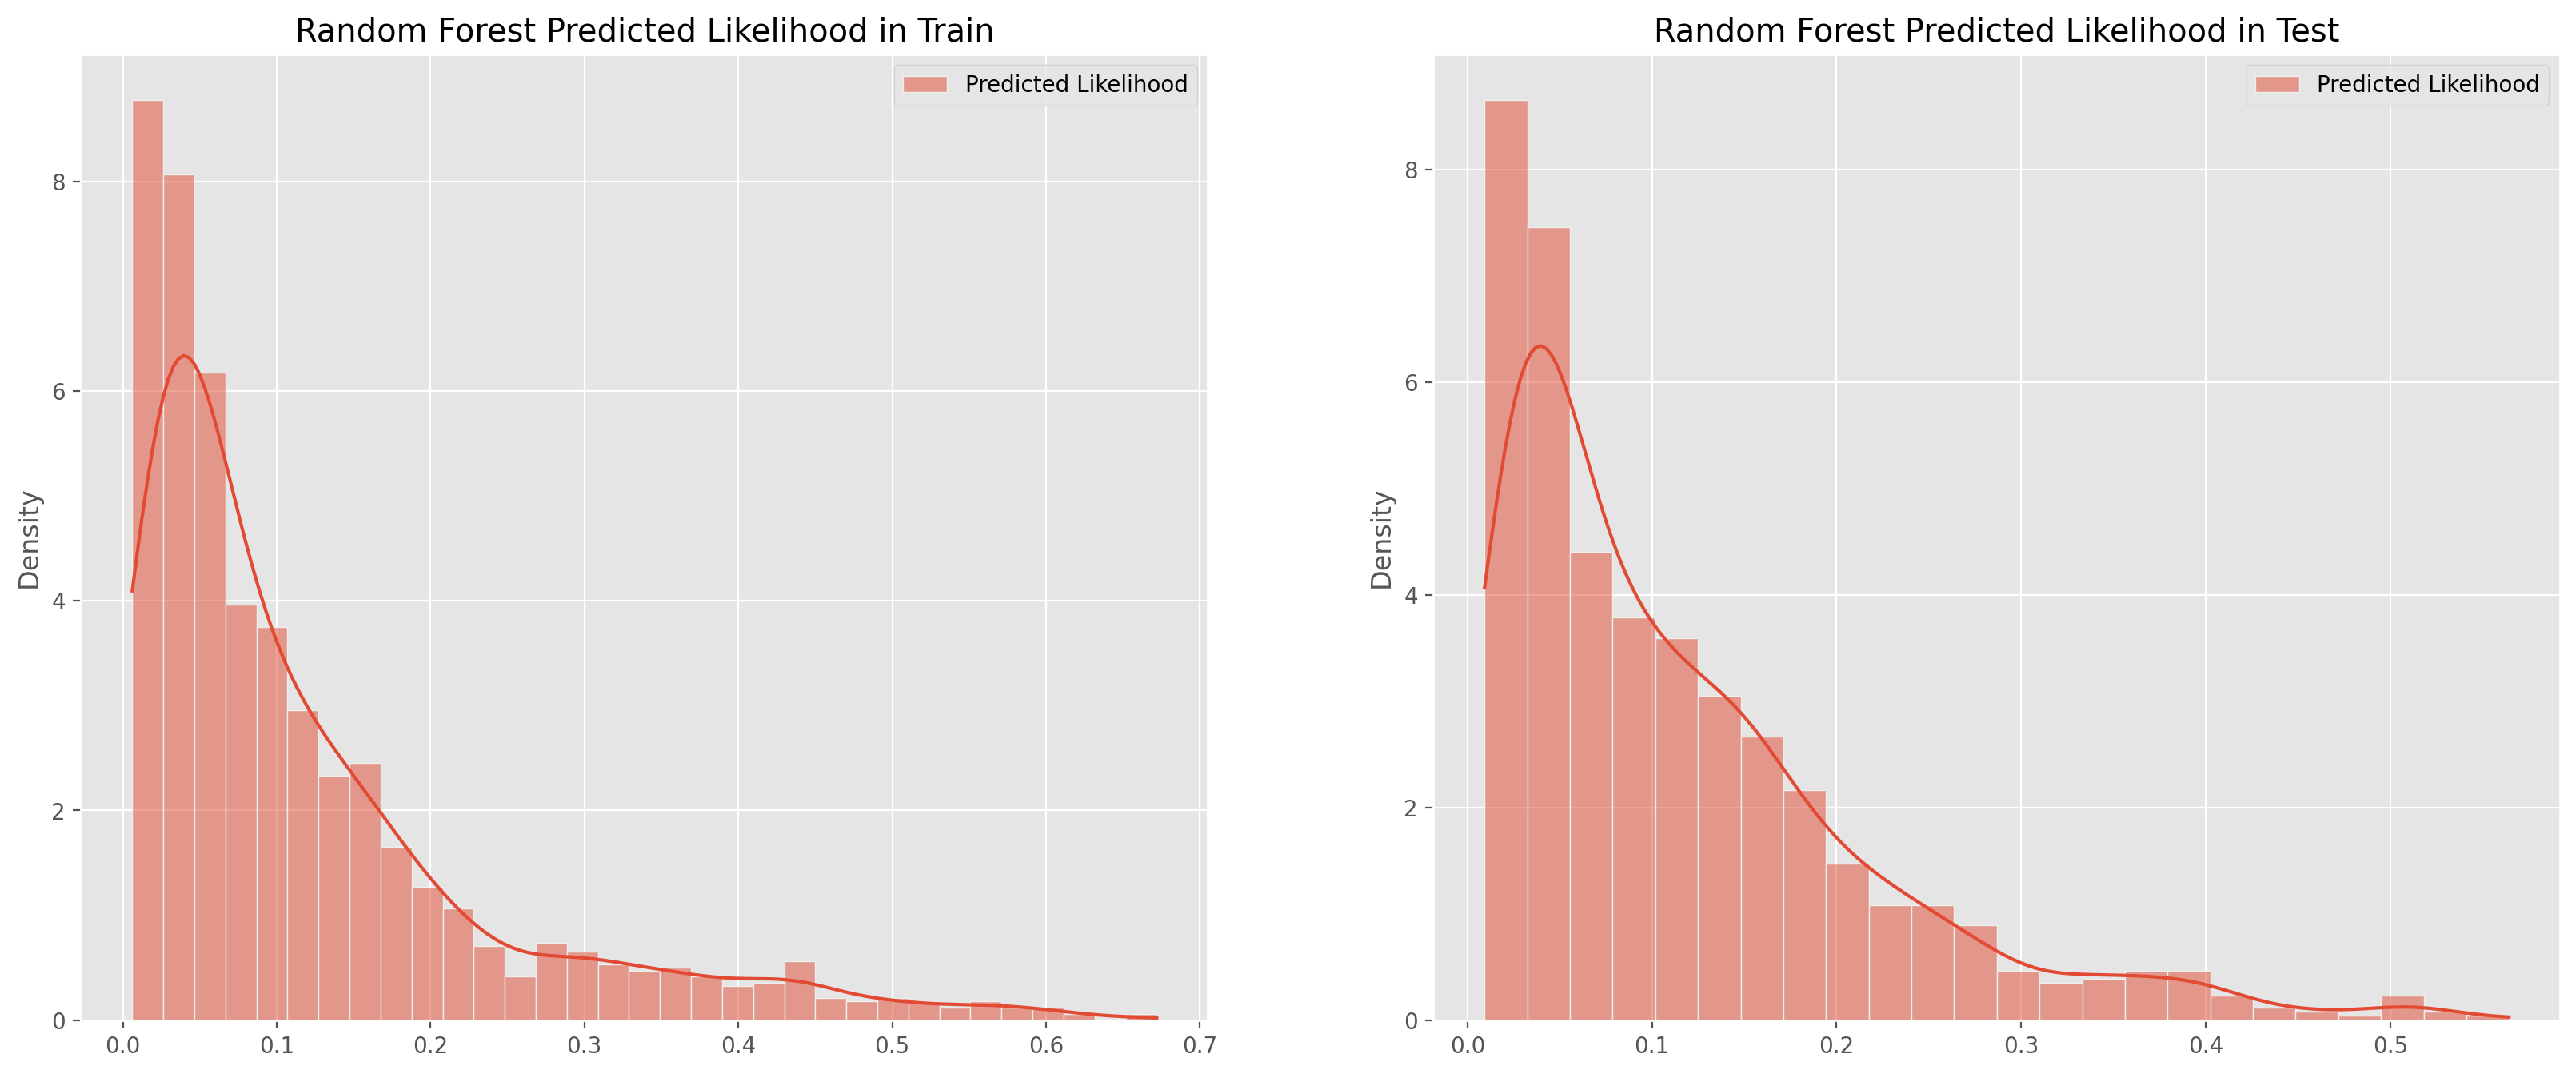

In [37]:
RF_preds_train = train_preds['Attrition_pred']
RF_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

data1 = pd.DataFrame({'Predicted Likelihood': RF_preds_train})
data2 = pd.DataFrame({'Predicted Likelihood': RF_preds_test})

fig, axes = plt.subplots(1, 2, figsize = (20, 8), dpi = 200)
sns.histplot(data = data1, kde = True, stat = 'density', ax = axes[0]).set(title = 'Random Forest Predicted Likelihood in Train')
sns.histplot(data = data2, kde = True, stat = 'density', ax = axes[1]).set(title = 'Random Forest Predicted Likelihood in Test')
plt.show();

In [38]:
submission['Attrition'] = RF_preds_test
submission.to_csv('RF_submission.csv', index = False)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">XGBoost Modeling</h1> 

In [39]:
XGB_cv_scores, XGB_imp = list(), list()
preds = list()

## Running 5 times CV
for i in range(5):
    
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        ## Scaling the data
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
        X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)
        
        ## Building RF model
        XGB_md = XGBClassifier(colsample_bytree = 0.7, 
                               gamma = 0.8, 
                               learning_rate = 0.01, 
                               max_depth = 7, 
                               min_child_weight = 10, 
                               n_estimators = 500, 
                               subsample = 0.7).fit(X_train, Y_train)
        XGB_imp.append(XGB_md.feature_importances_)
        
        ## Predicting on X_test and test
        XGB_pred_1 = XGB_md.predict_proba(X_test)[:, 1]
        XGB_pred_2 = XGB_md.predict_proba(test_logit)[:, 1]
        
        ## Computing roc-auc score
        XGB_cv_scores.append(roc_auc_score(Y_test, XGB_pred_1))
        preds.append(XGB_pred_2)

XGB_cv_score = np.mean(XGB_cv_scores)    
print('The average roc-auc score over 5-folds (run 5 times) is:', XGB_cv_score)

The average roc-auc score over 5-folds (run 5 times) is: 0.8421019812185067


We next proceed to visualize the importance of the features under the XGBoost model. 

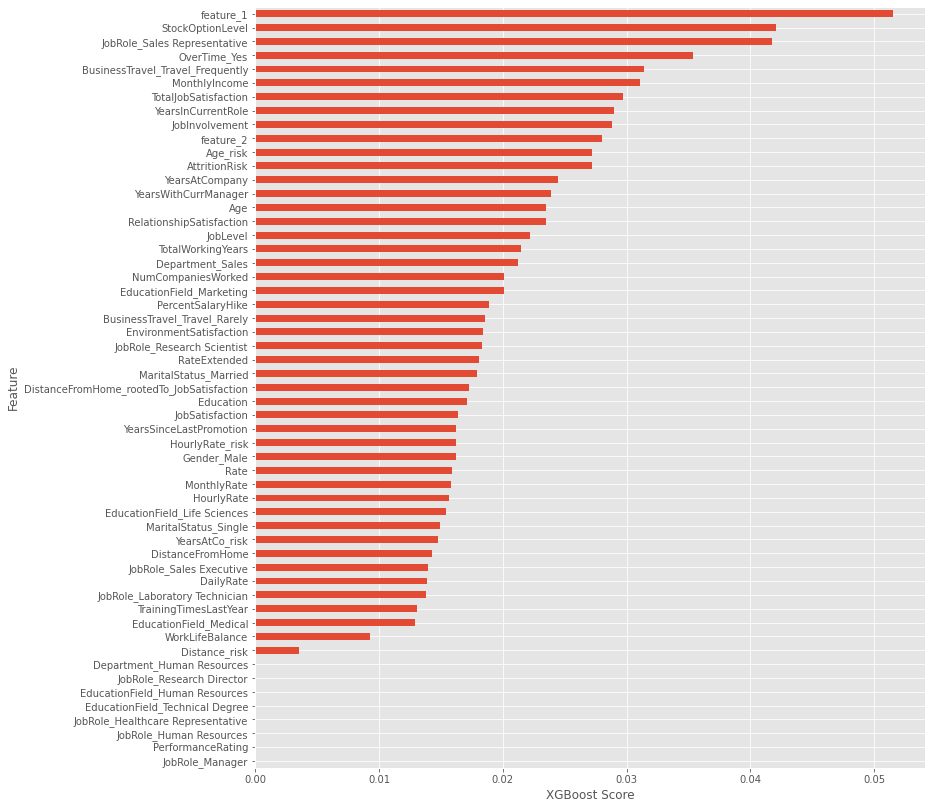

In [40]:
plt.figure(figsize = (12, 14))
pd.DataFrame(XGB_imp, columns = X.columns).apply(np.mean, axis = 0).sort_values().plot(kind = 'barh');
plt.xlabel('XGBoost Score')
plt.ylabel('Feature')
plt.show();

In [41]:
## Building model in the entire train dataset
XGB_md = XGBClassifier(colsample_bytree = 0.7, 
                       gamma = 0.8, 
                       learning_rate = 0.01, 
                       max_depth = 7, 
                       min_child_weight = 10, 
                       n_estimators = 500, 
                       subsample = 0.7).fit(X, Y)

train_preds = pd.DataFrame({'Attrition': Y, 'Attrition_pred': XGB_md.predict_proba(X)[:, 1]})
train_preds.head()

,Attrition,Attrition_pred
0,0,0.119206
1,0,0.048210
2,0,0.018398
3,0,0.041631
4,1,0.224137


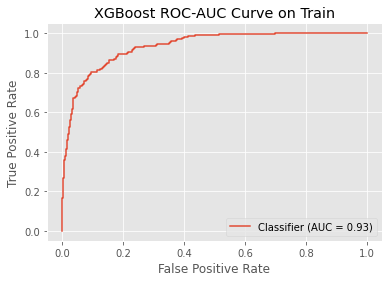

In [42]:
RocCurveDisplay.from_predictions(train_preds['Attrition'], train_preds['Attrition_pred'])
plt.title('XGBoost ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

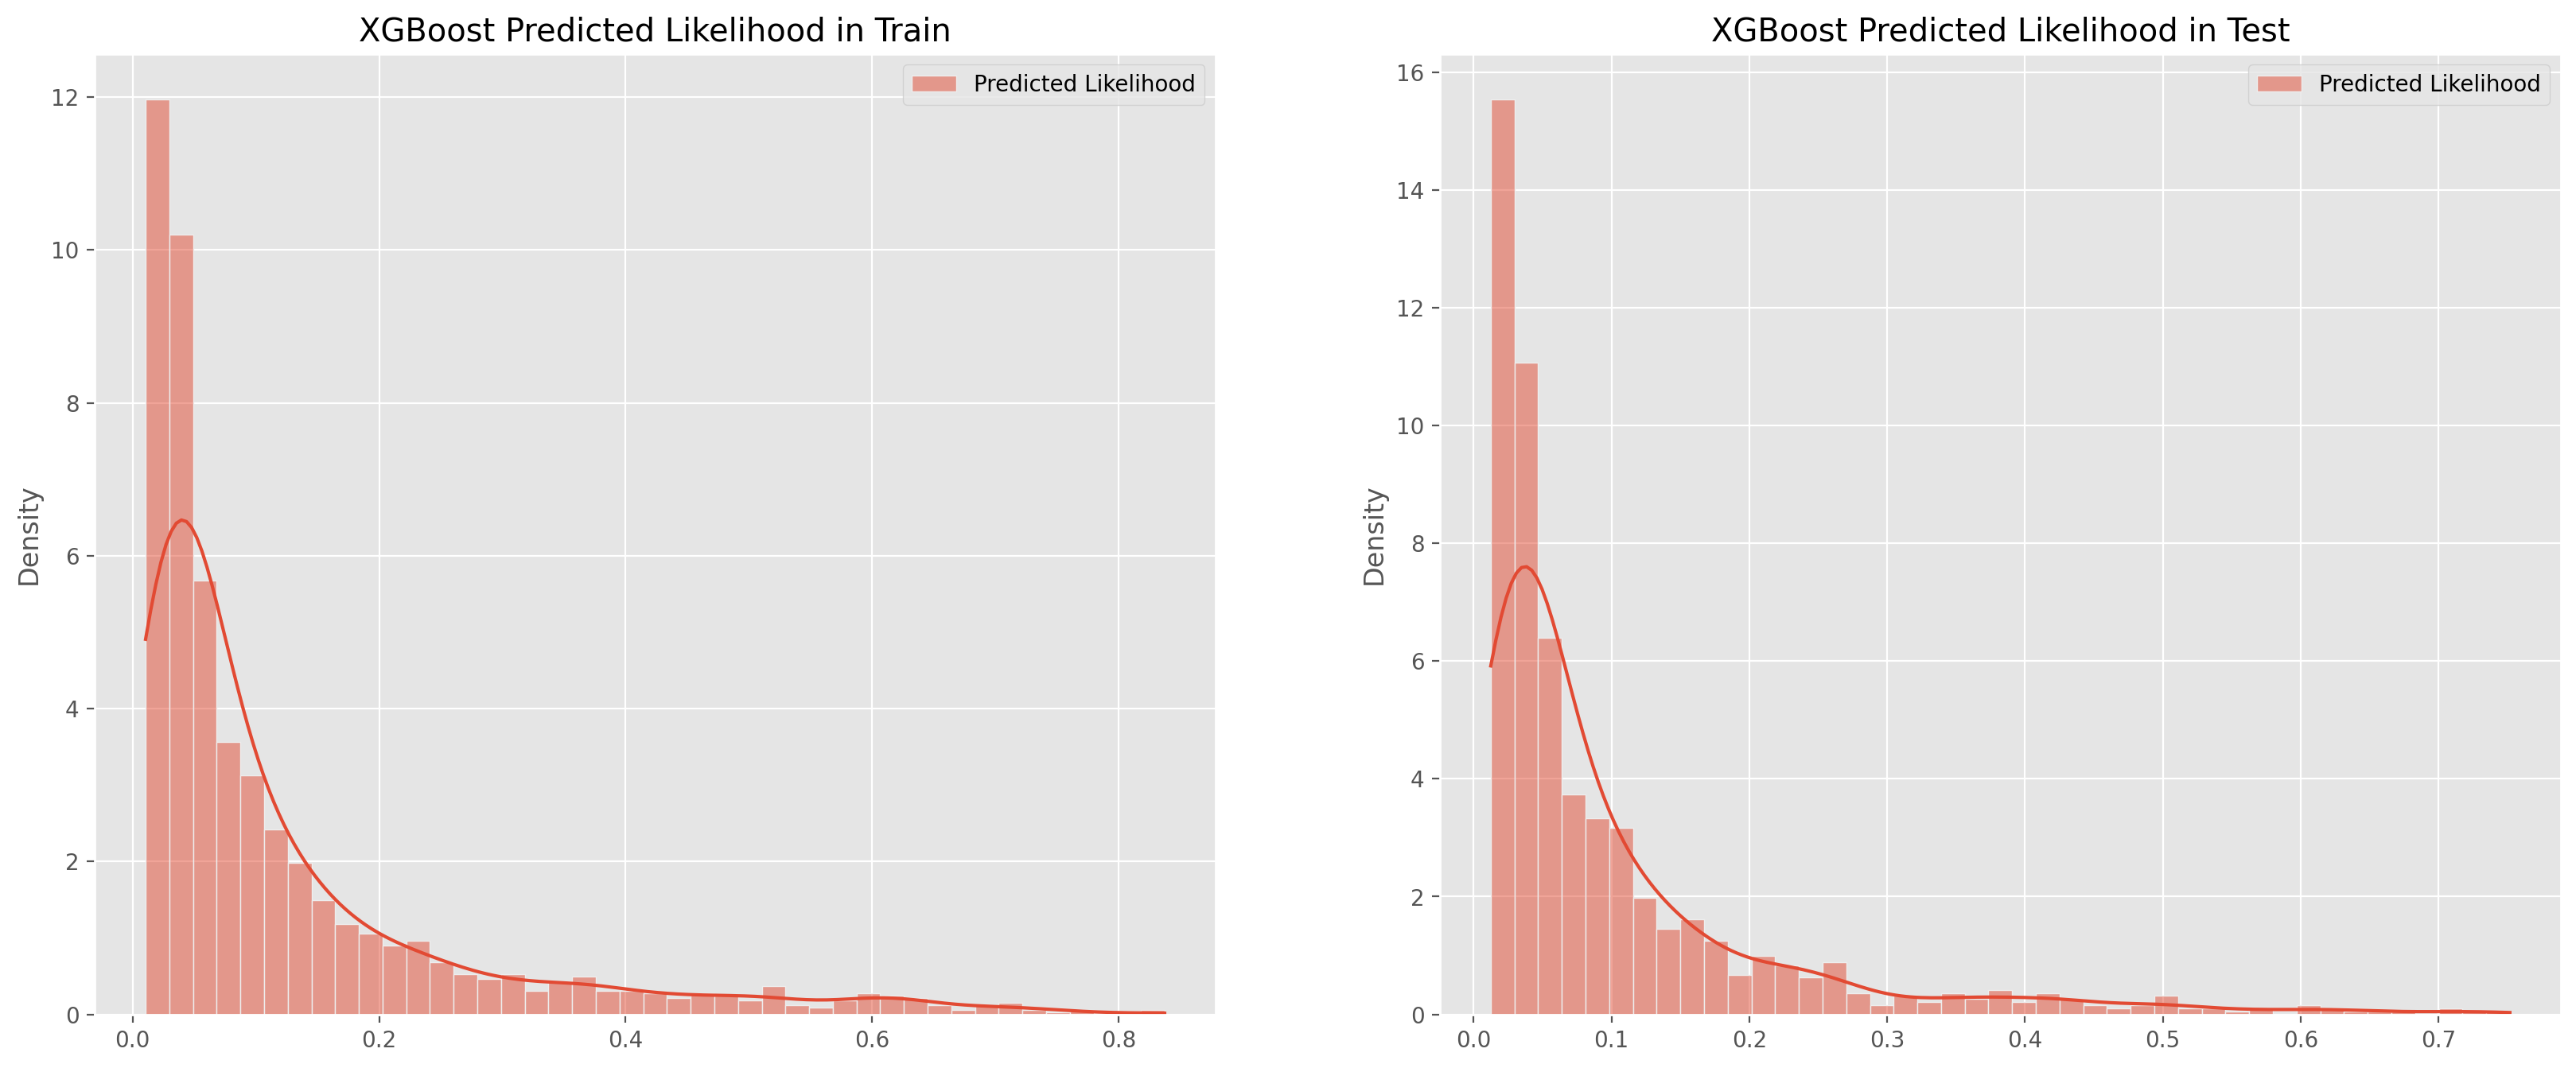

In [43]:
XGB_preds_train = train_preds['Attrition_pred']
XGB_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

data1 = pd.DataFrame({'Predicted Likelihood': XGB_preds_train})
data2 = pd.DataFrame({'Predicted Likelihood': XGB_preds_test})

fig, axes = plt.subplots(1, 2, figsize = (20, 8), dpi = 200)
sns.histplot(data = data1, kde = True, stat = 'density', ax = axes[0]).set(title = 'XGBoost Predicted Likelihood in Train')
sns.histplot(data = data2, kde = True, stat = 'density', ax = axes[1]).set(title = 'XGBoost Predicted Likelihood in Test')
plt.show();

In [44]:
submission['Attrition'] = XGB_preds_test
submission.to_csv('XGB_submission.csv', index = False)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">LightGBM Modeling</h1> 

In [45]:
lgb_cv_scores, lgb_imp = list(), list()
preds = list()

## Running 5 times CV
for i in range(5):
    
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        ## Scaling the data
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
        X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)
        
        ## Building RF model
        lgb_md = LGBMClassifier(n_estimators = 1000,
                                max_depth = 7,
                                learning_rate = 0.01,
                                num_leaves = 10,
                                lambda_l1 = 3,
                                lambda_l2 = 3,
                                bagging_fraction = 0.7,
                                feature_fraction = 0.7).fit(X_train, Y_train)
        lgb_imp.append(lgb_md.feature_importances_)
        
        ## Predicting on X_test and test
        lgb_pred_1 = lgb_md.predict_proba(X_test)[:, 1]
        lgb_pred_2 = lgb_md.predict_proba(test_logit)[:, 1]
        
        ## Computing roc-auc score
        lgb_cv_scores.append(roc_auc_score(Y_test, lgb_pred_1))
        preds.append(lgb_pred_2)

lgb_cv_score = np.mean(lgb_cv_scores)    
print('The average oof roc-auc score over 5-folds (run 5 times) is:', lgb_cv_score)

[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] 

We next proceed to visualize the importance of the features under the LightGBM model. 

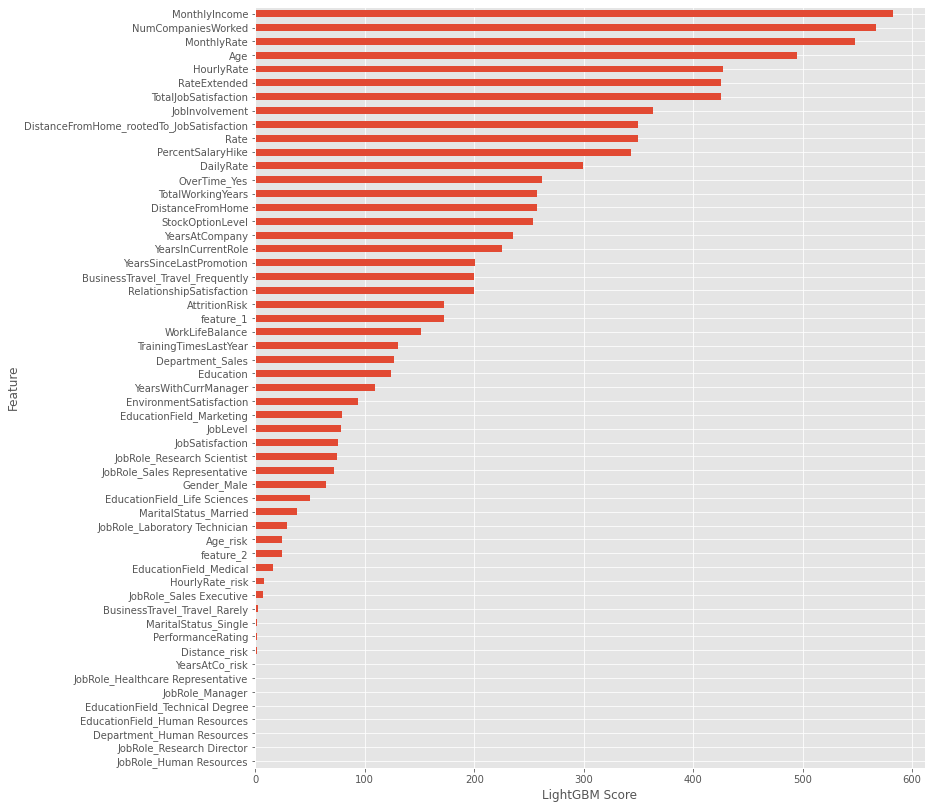

In [46]:
plt.figure(figsize = (12, 14))
pd.DataFrame(lgb_imp, columns = X.columns).apply(np.mean, axis = 0).sort_values().plot(kind = 'barh');
plt.xlabel('LightGBM Score')
plt.ylabel('Feature')
plt.show();

In [47]:
## Building model in the entire train dataset
lgb_md = LGBMClassifier(n_estimators = 1000,
                        max_depth = 7,
                        learning_rate = 0.01,
                        num_leaves = 10,
                        lambda_l1 = 3,
                        lambda_l2 = 3,
                        bagging_fraction = 0.7,
                        feature_fraction = 0.7).fit(X, Y)

train_preds = pd.DataFrame({'Attrition': Y, 'Attrition_pred': lgb_md.predict_proba(X)[:, 1]})
train_preds.head()

[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


,Attrition,Attrition_pred
0,0,0.085167
1,0,0.035947
2,0,0.006335
3,0,0.055708
4,1,0.296024


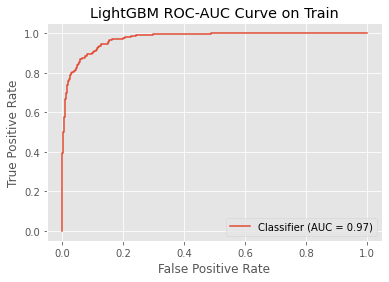

In [48]:
RocCurveDisplay.from_predictions(train_preds['Attrition'], train_preds['Attrition_pred'])
plt.title('LightGBM ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

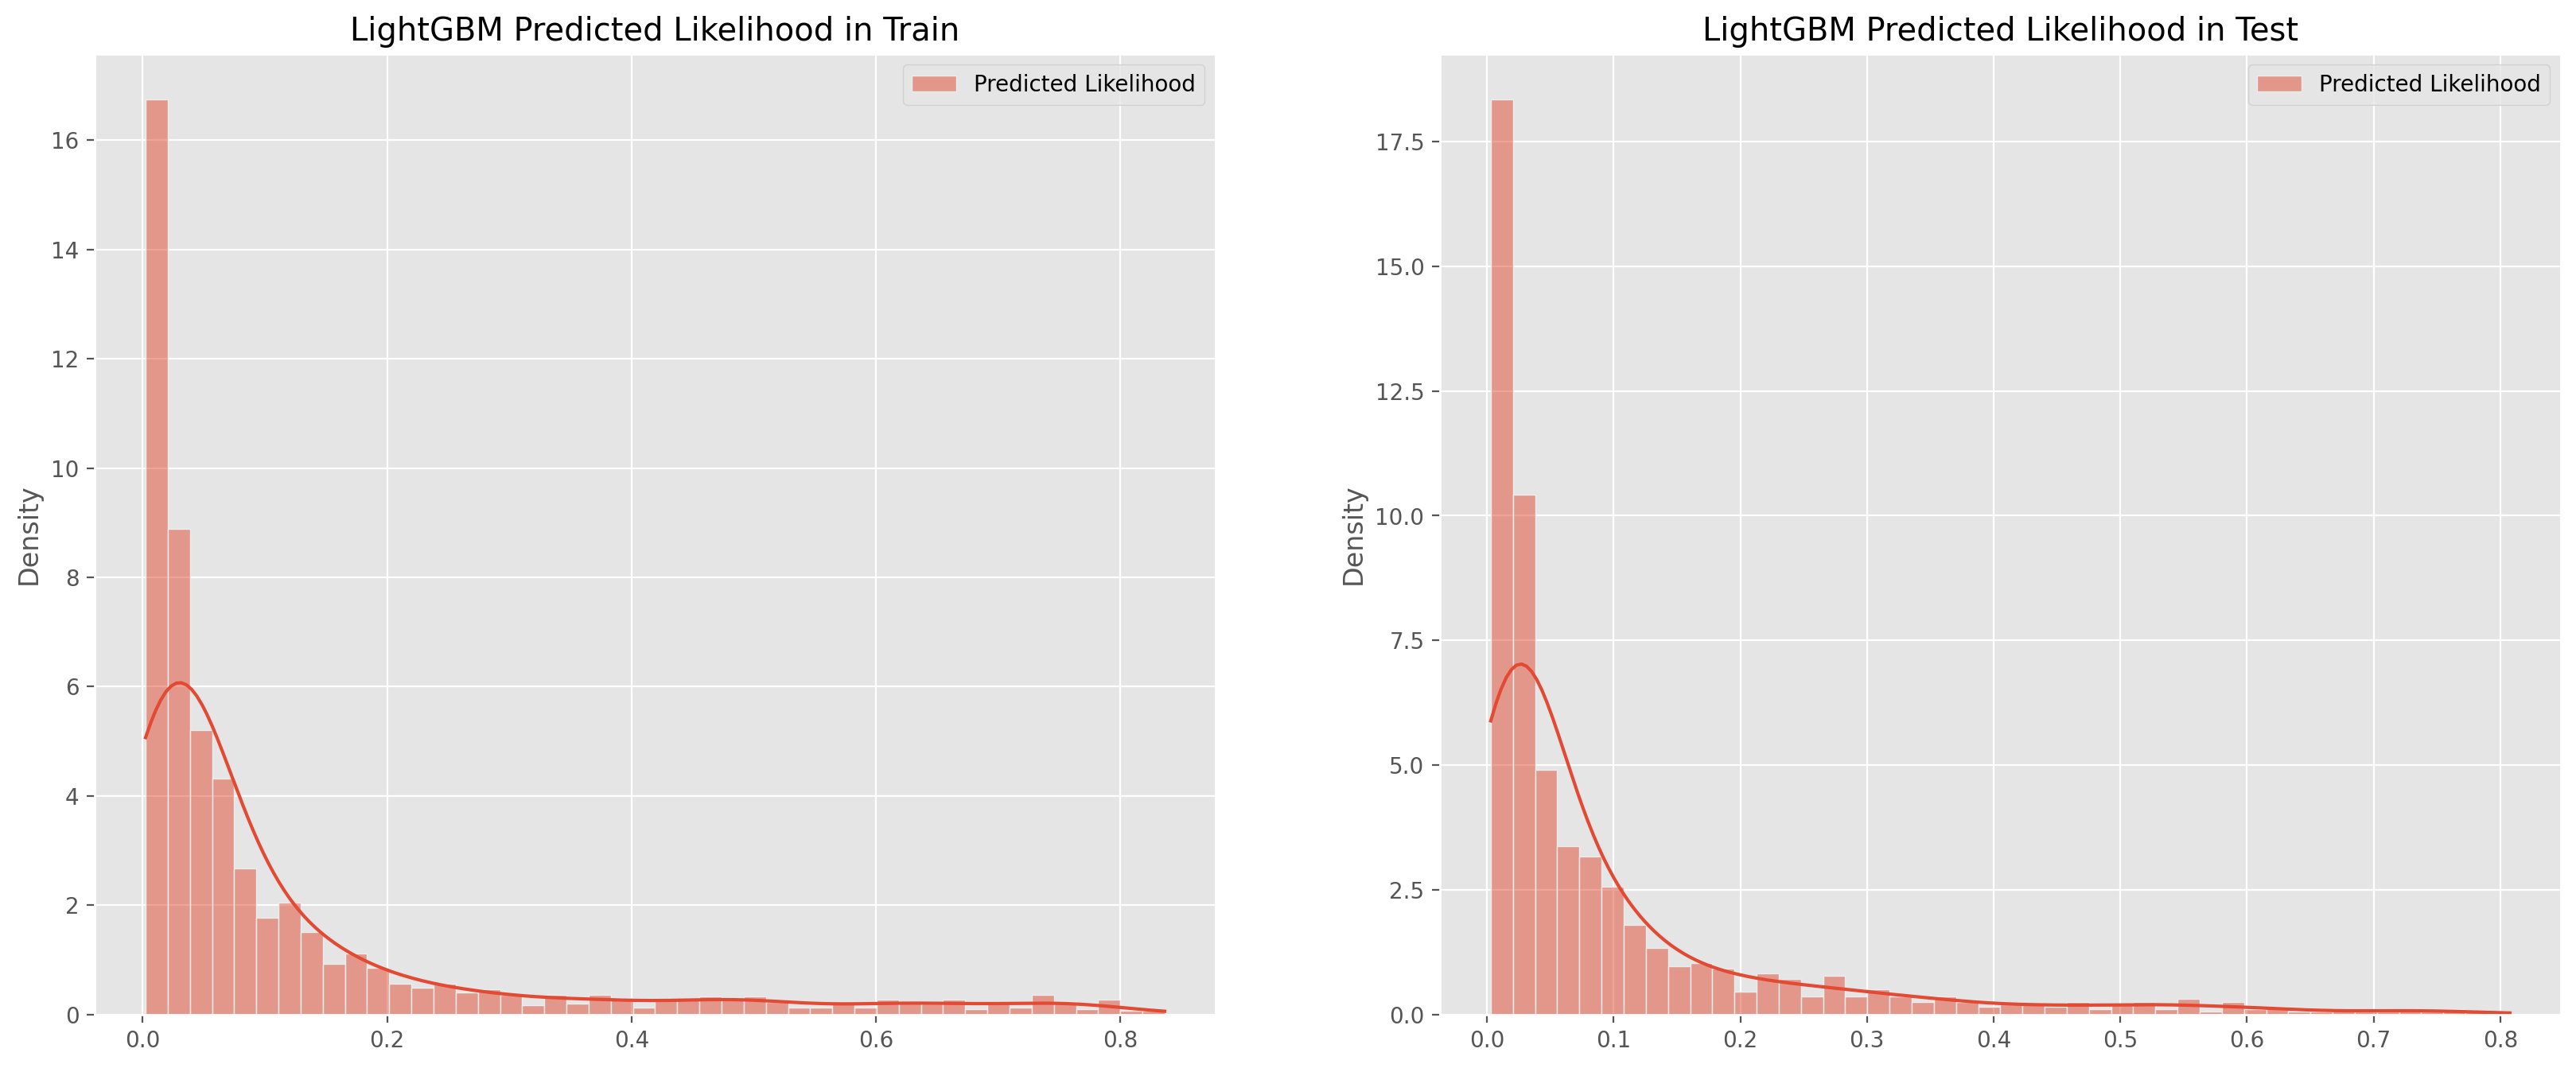

In [49]:
lgb_preds_train = train_preds['Attrition_pred']
lgb_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

data1 = pd.DataFrame({'Predicted Likelihood': lgb_preds_train})
data2 = pd.DataFrame({'Predicted Likelihood': lgb_preds_test})

fig, axes = plt.subplots(1, 2, figsize = (20, 8), dpi = 200)
sns.histplot(data = data1, kde = True, stat = 'density', ax = axes[0]).set(title = 'LightGBM Predicted Likelihood in Train')
sns.histplot(data = data2, kde = True, stat = 'density', ax = axes[1]).set(title = 'LightGBM Predicted Likelihood in Test')
plt.show();

In [50]:
submission['Attrition'] = lgb_preds_test
submission.to_csv('LightGBM_submission.csv', index = False)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">CatBoost Modeling</h1> 

In [51]:
cat_cv_scores, cat_imp = list(), list()
preds = list()

## Running 5 times CV
for i in range(5):
    
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        ## Scaling the data
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
        X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)
        
        ## Building the CatBoost model
        cat_md = CatBoostClassifier(iterations = 1000, 
                                    depth = 7,
                                    learning_rate = 0.01,
                                    rsm = 0.5,
                                    subsample = 0.9,
                                    l2_leaf_reg = 69,
                                    min_data_in_leaf = 20,
                                    random_strength = 0.175,
                                    random_seed = 836,
                                    task_type = 'CPU',
                                    bootstrap_type = 'Bernoulli',
                                    grow_policy = 'SymmetricTree',
                                    loss_function = 'Logloss',
                                    verbose = False).fit(X_train, Y_train)
        cat_imp.append(cat_md.feature_importances_)
            
        ## Predicting on X_test and test
        cat_pred_1 = cat_md.predict_proba(X_test)[:, 1]
        cat_pred_2 = cat_md.predict_proba(test_logit)[:, 1]
        
        ## Computing roc-auc score
        cat_cv_scores.append(roc_auc_score(Y_test, cat_pred_1))
        preds.append(cat_pred_2)
        
cat_cv_score = np.mean(cat_cv_scores)    
print('The average roc-auc score over 5-folds (run 5 times) is:', cat_cv_score)

The average roc-auc score over 5-folds (run 5 times) is: 0.8427314475492441


We next proceed to visualize the importance of the features under the CatBoost model. 

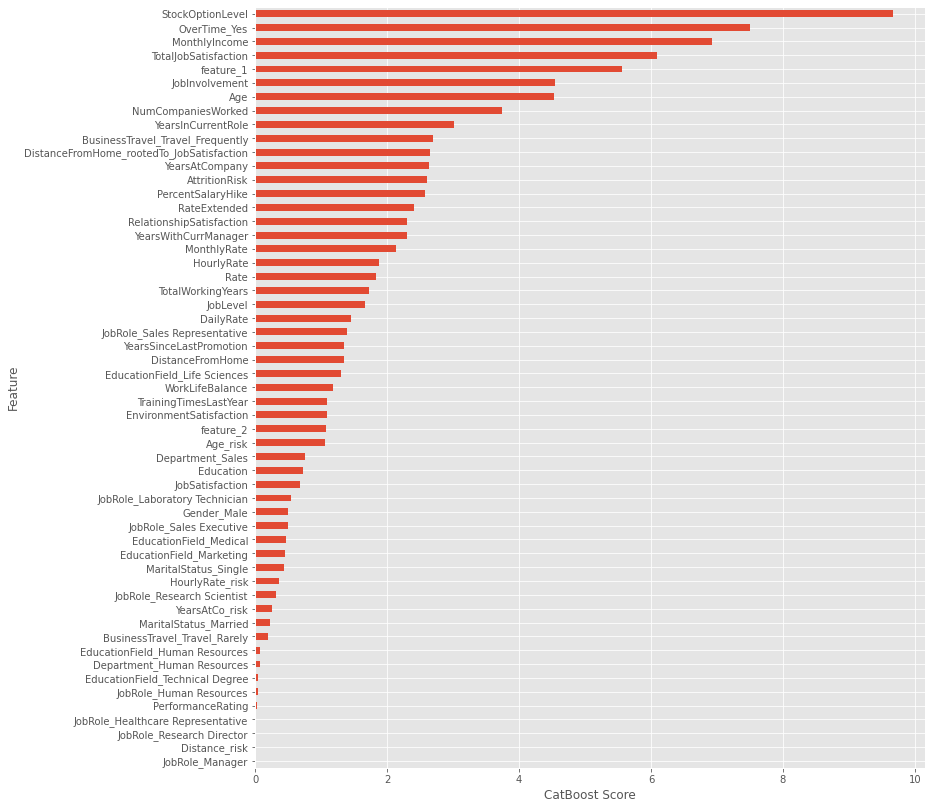

In [52]:
plt.figure(figsize = (12, 14))
pd.DataFrame(cat_imp, columns = X.columns).apply(np.mean, axis = 0).sort_values().plot(kind = 'barh');
plt.xlabel('CatBoost Score')
plt.ylabel('Feature')
plt.show();

In [53]:
## Building model in the entire train dataset
cat_md = CatBoostClassifier(iterations = 1000,
                            depth = 7,
                            learning_rate = 0.01,
                            rsm = 0.5,
                            subsample = 0.9,
                            l2_leaf_reg = 69,
                            min_data_in_leaf = 20,
                            random_strength = 0.175,
                            random_seed = 836,
                            task_type = 'CPU',
                            bootstrap_type = 'Bernoulli',
                            grow_policy = 'SymmetricTree',
                            loss_function = 'Logloss',
                            verbose = False).fit(X, Y)
                  
train_preds = pd.DataFrame({'Attrition': Y, 'Attrition_pred': cat_md.predict_proba(X)[:, 1]})
train_preds.head()

,Attrition,Attrition_pred
0,0,0.110135
1,0,0.049026
2,0,0.022879
3,0,0.076738
4,1,0.316230


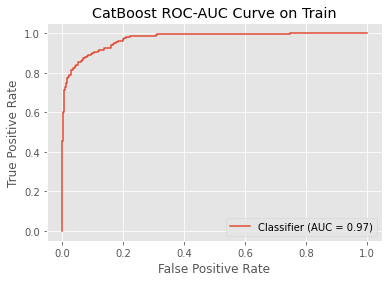

In [54]:
RocCurveDisplay.from_predictions(train_preds['Attrition'], train_preds['Attrition_pred'])
plt.title('CatBoost ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

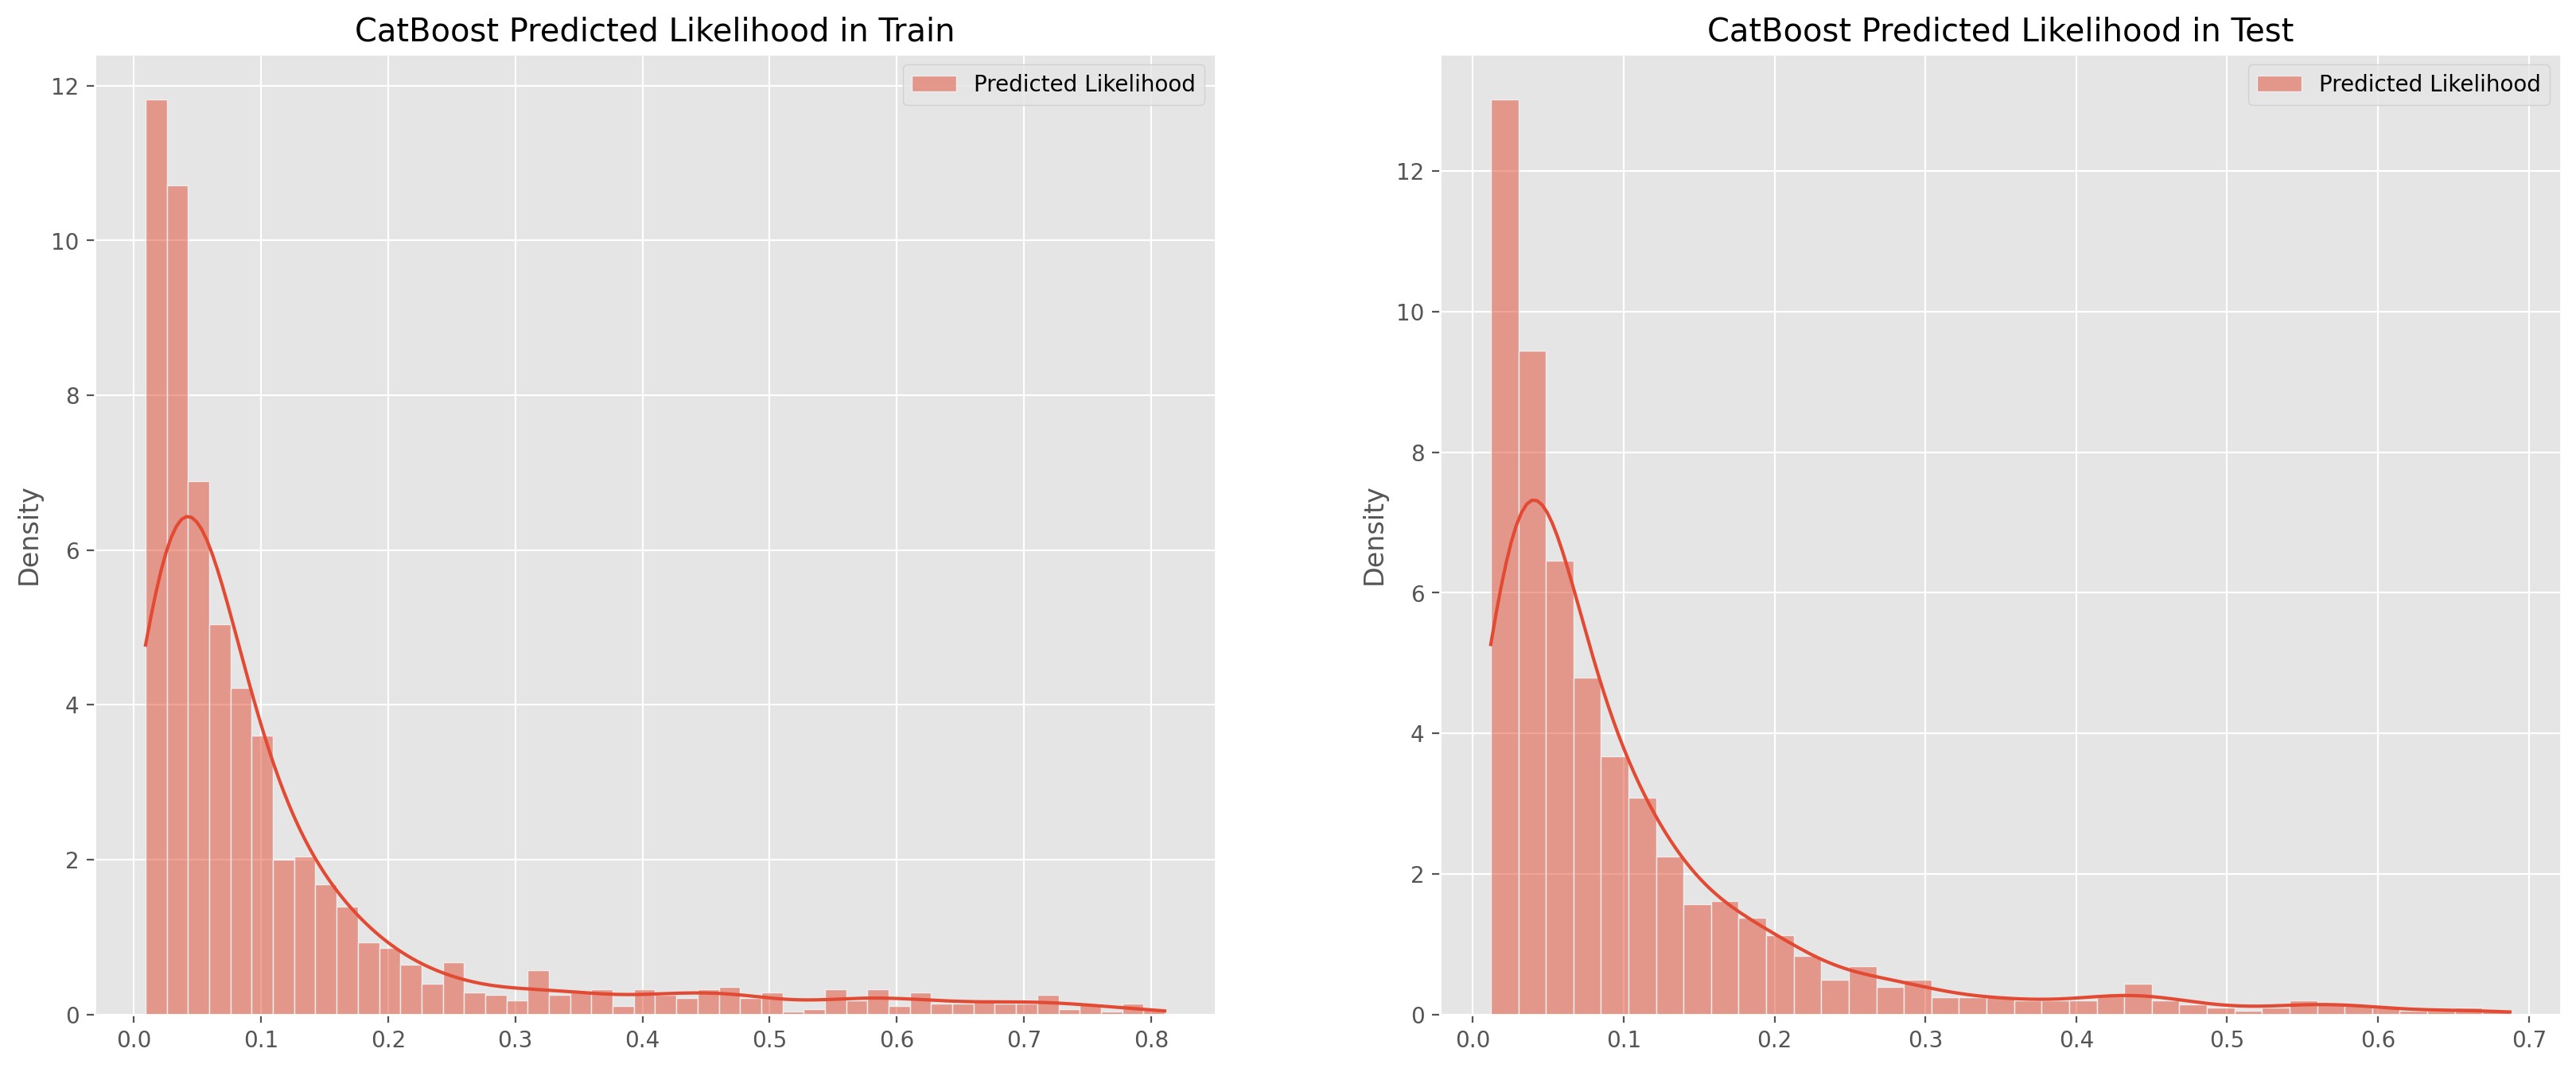

In [55]:
cat_preds_train = train_preds['Attrition_pred']
cat_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

data1 = pd.DataFrame({'Predicted Likelihood': cat_preds_train})
data2 = pd.DataFrame({'Predicted Likelihood': cat_preds_test})

fig, axes = plt.subplots(1, 2, figsize = (20, 8), dpi = 200)
sns.histplot(data = data1, kde = True, stat = 'density', ax = axes[0]).set(title = 'CatBoost Predicted Likelihood in Train')
sns.histplot(data = data2, kde = True, stat = 'density', ax = axes[1]).set(title = 'CatBoost Predicted Likelihood in Test')
plt.show();

In [56]:
submission['Attrition'] = cat_preds_test
submission.to_csv('CatBoost_submission.csv', index = False)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Model Performance Comparisson</h1> 

First, we compare the model performance in terms of their average oof roc-auc score.

In [57]:
md_scores = pd.DataFrame({'Logistic': logit_cv_scores, 'RF': RF_cv_scores, 'XGB': XGB_cv_scores, 'LightGBM': lgb_cv_scores, 'CatBoost': cat_cv_scores})
avg_scores = pd.DataFrame(md_scores.apply(np.mean, axis = 0))
avg_scores.columns = ['Avg. OOF ROC-AUC Score']
avg_scores

,Avg. OOF ROC-AUC Score
Logistic,0.830170
RF,0.829179
XGB,0.842102
LightGBM,0.834367
CatBoost,0.842731


From the above, CatBoost is the model with the best performance. We next compare the 5-fold CV score by comparing their distributions.

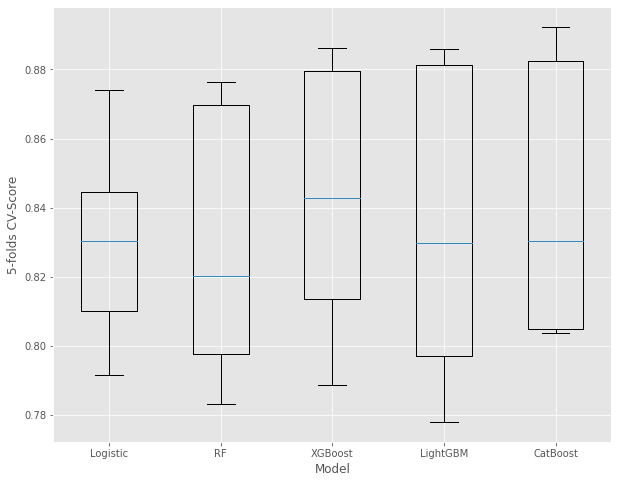

In [58]:
plt.figure(figsize = (10, 8))

plt.boxplot(md_scores, labels = ['Logistic','RF', 'XGBoost', 'LightGBM', 'CatBoost'])
plt.xlabel('Model')
plt.ylabel('5-folds CV-Score');

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Ensemble Learning</h1> 

The first ensemble is the average of the 5 models.

In [59]:
ensemble_pred = (logit_preds_test + RF_preds_test + XGB_preds_test + lgb_preds_test + cat_preds_test) / 5

submission['Attrition'] = ensemble_pred
submission.head()

,id,Attrition
0,1677,0.195918
1,1678,0.109477
2,1679,0.028789
3,1680,0.059271
4,1681,0.447406


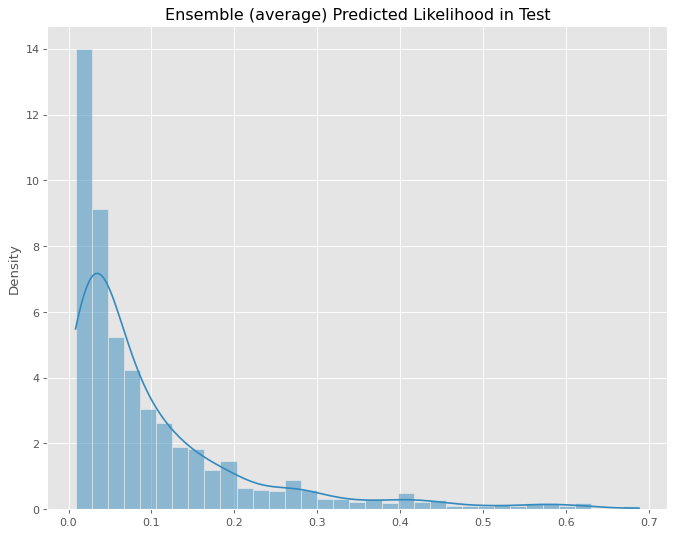

In [60]:
plt.figure(figsize = (10, 8), dpi = 80)
sns.histplot(data = ensemble_pred, kde = True, stat = 'density').set(title = 'Ensemble (average) Predicted Likelihood in Test');

In [61]:
submission.to_csv('average_ensemble_submission.csv', index = False)

The second ensemble is the weighted average of the boosted tree models.

In [62]:
wtot = logit_cv_score + RF_cv_score + XGB_cv_score + lgb_cv_score + cat_cv_score
w1 = logit_cv_score / wtot
w2 = RF_cv_score / wtot
w3 = XGB_cv_score / wtot
w4 = lgb_cv_score / wtot
w5 = cat_cv_score / wtot


ensemble_pred = w1*logit_preds_test + w2*RF_preds_test + w3*XGB_preds_test + w4*lgb_preds_test + w5*cat_preds_test

submission['Attrition'] = ensemble_pred
submission.head()

,id,Attrition
0,1677,0.195963
1,1678,0.109307
2,1679,0.028835
3,1680,0.059156
4,1681,0.447730


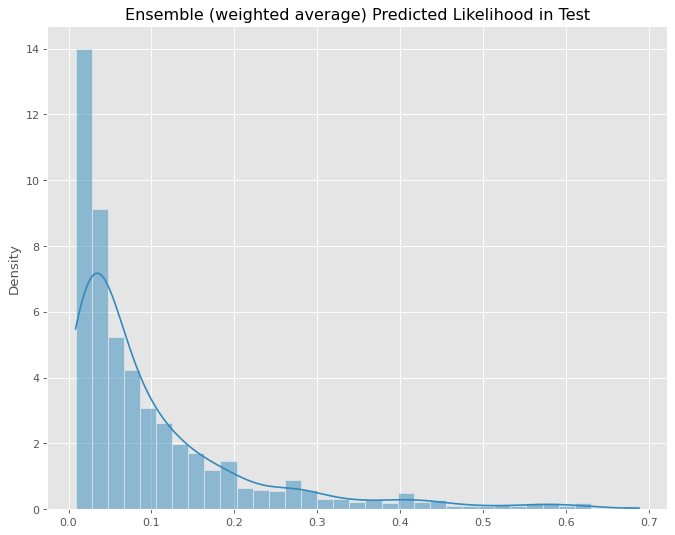

In [63]:
plt.figure(figsize = (10, 8), dpi = 80)
sns.histplot(data = ensemble_pred, kde = True, stat = 'density').set(title = 'Ensemble (weighted average) Predicted Likelihood in Test');

In [64]:
submission.to_csv('weighted_average_ensemble_submission.csv', index = False)